# Hydraulics and Thermodynamics: stream velocity , cross section, Friction factor, Reynolds and Nusselt number

# Stream velocity

**We calculate the averaged stream velocity between two sections by picking the time between two conductivity breakthrough curve peak. We assume that the averaged cross section is constant during this short time. The distance between controlled gates are deduced from DEMs. (see [`P1_Discharges.ipynb`](P1_Discharges.ipynb))** 

$V = d/t$ 

with  $V$ velocity, $d$ distance (from DEM), and $t$ time between to conductivity peak

**We also can estimate the cross section S from:**

$S = Q/V$

Discharge $Q$ is taken from [`P1_Discharges.ipynb`](P1_Discharges.ipynb),[`P2_Discharges.ipynb`](P2_Discharges.ipynb),[`P3_Discharges.ipynb`](P3_Discharges.ipynb)

**Friction factor $f$ is calculated from Darcy-Weisbach equation:** 
 
 $\Delta p/L = f*\rho /2 * v^2 / D $

## Method

Date and Time at the conductivity peak is extracted from CTD conductivity time series, and stored in a Tuple Dictionnary called `time_peak` with `location` and `injection` reference. Because there can be be several injections in one single time series, the corresponding breakthrough curve are extracted manually by `indices`. 

When conductivity is not detected (sometimes @P5) or not reccorded (no CTD at P4), we store the injection time "mannually" from our field notes. **In this case, note that most of the times seconds were not writtting down, which can lead to some uncertainties**. However some injections were made at the exact minute (:00s).

By this way, we can get the time of the peak within `time_peak` by calling a given station (ex "P1") for a given injection (ex: injection 18)

The time between two conductivity peaks for a given injection experiement give the travel time of the tracer (returned by the function `travel_time`). The velocity is obtained with the function `velocity` by incorporing the distance between the two stations.


In [1]:
using NBInclude
@nbinclude("helper-functions.ipynb");
using PyPlot;
using Interpolations
using DataFrames
using CSV
matplotlib.rcdefaults()

In [2]:
#PyPlot font size characteristic

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 10,
        "axes.labelsize" => 10,
        "xtick.labelsize" => 10,
        "ytick.labelsize" => 10,
        "legend.fontsize" => 10,
)
merge!(rcParams, font0);

In [3]:

#creation of time_peak which will store all the time at conductivity peak for all experiments 

time_peak = Dict{Tuple{Int,String},Any}();

## Distance between gates (from  DEM) 

In [4]:
#from DEM: Origin at P5
dist= Dict{Any,Any}();
dist["P1"]=464.4;
dist["P2"]=312.6;
dist["P3"]=253.7;
dist["P4"]=151.3;
dist["P5"]=0;

## Conductivity peak @ P1 for each injection

**`plotit` allows to display the experiment and then to extract manually the breakthrough curve if they are many**

**Peak is determined with the function `findmax` within `indices` selected (1 `indices` range  = 1 injection)**

**Injection 2**

In [5]:
#pygui(true)
#plotit(path_CTD*"2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv", :CTD, :cond)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv");
peak=findmax(d[:cond])
time_peak[(2,"P1")]=d[:t][peak[2]];

**5,6**

In [6]:
#pygui(true)
#plotit(path_CTD*"2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv", :CTD, :cond, plottime=true)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv");
indices=[12000:15000,20700:21300]
for (i,id,index1) in zip(indices,[5,6],[12000,20700])  #index1 allows to re-set the right time, as findmax has it own independant index
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]  
end  


**7 , 8 , 9 , 10 , 11 , 12 , 13 , 14**

In [7]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv", :CTD, :cond, plottime=false);
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv");
indices=[12400:12600, 12875:13577, 14133:14221, 15000:15060, 16124:16302, 16653:16920, 28882:28946, 29512:29754];
for (i,id,index1) in zip(indices,[7,8,9,10,11,12,13,14],[12400,12875,14133,15000,16124,16653,28882,29512])  #index1 allows to re-set the right time, as findmax has it own independant index
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]  
end  

**15,16,17**

In [8]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv");
indices=[303:348,577:691,830:974];
for (i,id,index1) in zip(indices,[15,16,17],[303,577,830])  #index1 allows to re-set the right time, as findmax has it own independant index
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]    
end  


**18 , 19 , 20 , 21 , 22**

In [9]:
#pygui(true)
#plotit(path_CTD*"2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv");
indices=[388:426,1474:1591,16149:16194,17068:17157,18199:18229];
for (i,id,index1) in zip(indices,[18,19,20,21,22],[388,1474,16149,17068,18199])  #index1 allows to re-set the right time, as findmax has it own independant index
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]   
end  


**25,26**

In [10]:
##plotit(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv");
indices=[11836:12005,12230:12430];
for (i,id,index1) in zip(indices,[25,26],[11836,12230])  #index1 allows to re-set the right time, as findmax has it own independant index
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]    
end  

**27 , 28 , 29 , 30, 31, 32**

In [11]:
#plotit(path_CTD*"2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv");
indices=[652:740,1645:1761,4062:4105,4380:4456,14991:15050,15248:15345];
for (i,id,index1) in zip(indices,[27,28,29,30,31,32],[652,1645,4062,4380,14991,15248])  #index1 allows to re-set the right time, as findmax has it own independant index
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]    
end  


**33**

In [12]:
#plotit(path_CTD*"2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv", :CTD, :cond, plottime=true)
d=read_Keller_DCX22_CTD(path_CTD*"2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv");
indices=[1373:1441];
for (i,id,index1) in zip(indices,[33],[1373])  
peak=findmax(d[:cond][i])
time_peak[(id,"P1")]=d[:t][peak[2]+index1]  
end  


**35  WRONG RECORDING TIME ?!**

The breakthtough curve at P1 starts before the injection time at P5 !? We do not keep this one

In [13]:
#pygui(true)
#plotit(path_CTD*"2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv", :CTD, :cond, plottime=true)
d=read_Keller_DCX22_CTD(path_CTD*"2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv");
indices=[142:2381];
for (i,id,index1) in zip(indices,[35],[142])  
#peak=findmax(d[:cond][i])
#time_peak[(id,"P1")]=d[:t][peak[2]+index1]    
end  


## Conductivity peak @ P2 for each injection

**2**

In [14]:
#pygui(true)
#plotit(path_CTD*"2019-07-04/205309-100mH2O_04_07_2019-08_00_00.csv", :CTD, :cond)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-04/205309-100mH2O_04_07_2019-08_00_00.csv");
peak=findmax(d[:cond])
time_peak[(2,"P2")]=d[:t][peak[2]] ;   

**5,6**

In [15]:
#pygui(true)
#plotit(path_CTD*"2019-07-09/205145-10mH2O_09_07_2019-08_00_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-09/205145-10mH2O_09_07_2019-08_00_00.csv");
indices=[11457:16069,20421:21091];
for (i,id,index1) in zip(indices,[5,6],[11457,20421])
peak=findmax(d[:cond][i])
time_peak[(id,"P2")]=d[:t][peak[2]+index1]   
end  

**7,8,9,10,11,12,13,14**

In [16]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205145-10mH2O_09_07_2019-16_15_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205145-10mH2O_09_07_2019-16_15_00.csv");
indices=[12583:12758,12950:14022,14186:14373,15133:15246,16259:16518,16775:17129,29023:29080,29660:29916];
for (i,id,index1) in zip(indices,[7,8,9,10,11,12,13,14],[12583,12950,14186,15133,16259,16775,29023,29660])
peak=findmax(d[:cond][i])
time_peak[(id,"P2")]=d[:t][peak[2]+index1]      
end  






**15,16,17**

In [17]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205145-10mH2O_11_07_2019-11_30_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205145-10mH2O_11_07_2019-11_30_00.csv");
indices=[459:482,720:845,968:1134];
for (i,id,index1) in zip(indices,[15,16,17],[459,720,968])
peak=findmax(d[:cond][i])
time_peak[(id,"P2")]=d[:t][peak[2]+index1]     
end  


**18,19,20,21,22**

In [18]:
#pygui(true)
#plotit(path_CTD*"2019-07-16/205145-10mH2O_15_07_2019-15_00_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-16/205145-10mH2O_15_07_2019-15_00_00.csv");
indices=[9:39,1094:1158,15728:15837,16699:16757,17807:17860];
for (i,id,index1) in zip(indices,[18,19,20,21,22],[9,1094,15728,16699,17807])
peak=findmax(d[:cond][i])
time_peak[(id,"P2")]=d[:t][peak[2]+index1]   
end  



**23,24,25,26**

In [19]:
#pygui(true)
#plotit(path_CTD*"2019-07-25/205145-10mH2O_24_07_2019-16_15_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-25/205145-10mH2O_24_07_2019-16_15_00.csv");
indices=[168:195,550:600,11481:11500,11859:11913];
for (i,id,index1) in zip(indices,[23,24,25,26],[168,550,11481,11859])
peak=findmax(d[:cond][i])
time_peak[(id,"P2")]=d[:t][peak[2]+index1]   
end  





**28,29,30,31,32**

In [20]:
#pygui(true)
#plotit(path_CTD*"2019-07-31/205145-10mH2O_30_07_2019-13_30_00.csv", :CTD, :cond, plottime=true)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-31/205145-10mH2O_30_07_2019-13_30_00.csv");
indices=[911:985,3330:3350,3644:3742,14235:14314,14498:14607];
for (i,id,index1) in zip(indices,[28,29,30,31,32],[911,3330,3644,14235,14498])
peak=findmax(d[:cond][i])
time_peak[(id,"P2")]=d[:t][peak[2]+index1]   
end  

## Conductivity peak @ P3 for each injection


**5,8,11,12,14** 

In [21]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/207265-300mH2O_09_07_2019-08_00_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-11/207265-300mH2O_09_07_2019-08_00_00.csv");
indices=[2174:2981,18817:19665,22170:22251,22683:22870,35534:35793];
for (i,id,index1) in zip(indices,[5,8,11,12,14],[2174,18817,22170,22683,35534])
peak=findmax(d[:cond][i])
time_peak[(id,"P3")]=d[:t][peak[2]+index1]    
end  

**16,17**

In [22]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/207265-300mH2O_11_07_2019-11_00_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-11/207265-300mH2O_11_07_2019-11_00_00.csv");
indices=[1038:1163,1302:1425];
for (i,id,index1) in zip(indices,[16,17],[1038,1302])
peak=findmax(d[:cond][i])
time_peak[(id,"P3")]=d[:t][peak[2]+index1]   
end


**19,21**

In [23]:
#pygui(true)
#plotit(path_CTD*"2019-07-16/207265-300mH2O_15_07_2019-15_30_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-16/207265-300mH2O_15_07_2019-15_30_00.csv");
indices=[703:819,16300:16429];
for (i,id,index1) in zip(indices,[19,21],[703,16300])
peak=findmax(d[:cond][i])
time_peak[(id,"P3")]=d[:t][peak[2]+index1]   
end


**24,26**

In [24]:
#pygui(true)
#plotit(path_CTD*"2019-07-25/207265-300mH2O_24_07_2019-13_45_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-25/207265-300mH2O_24_07_2019-13_45_00.csv");
indices=[2328:2387,13605:13771];
for (i,id,index1) in zip(indices,[24,26],[2328,13605])
peak=findmax(d[:cond][i])
time_peak[(id,"P3")]=d[:t][peak[2]+index1]  
end

**28,30,32**

In [25]:
#pygui(true)
#plotit(path_CTD*"2019-07-31/207265-300mH2O_30_07_2019-13_45_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-31/207265-300mH2O_30_07_2019-13_45_00.csv");
indices=[712:796,3418:3529,14300:14391];
for (i,id,index1) in zip(indices,[28,30,32],[712,3418,14300])
peak=findmax(d[:cond][i])
time_peak[(id,"P3")]=d[:t][peak[2]+index1]  
end


**33**

In [26]:
#pygui(true)
#plotit(path_CTD*"2019-08-23/207265-300mH2O_23_08_2019-11_00_00.csv", :CTD, :cond, plottime=true)
d = read_Keller_DCX22_CTD(path_CTD*"2019-08-23/207265-300mH2O_23_08_2019-11_00_00.csv");
indices=[1317:1333];
for (i,id,index1) in zip(indices,[33],[1317])
peak=findmax(d[:cond][i])
time_peak[(id,"P3")]=d[:t][peak[2]+index1] 
end

## Injection time @ P4 

**There is no CTD @P4 but few injections were done there. Here we store the injection time from field notes**

In [27]:
#Injection 3
time_peak[(3,"P4")]=DateTime(2019,7,8,13,16)

#Injection 4
time_peak[(4,"P4")]=DateTime(2019,7,8,14,45)

#Injection 5
time_peak[(5,"P4")]=DateTime(2019,7,9,10,50)

#Injection 8
time_peak[(8,"P4")]=DateTime(2019,7,10,10,1)

#Injection 11
time_peak[(11,"P4")]=DateTime(2019,7,10,14,44)

#Injection 16
time_peak[(16,"P4")]=DateTime(2019,7,11,12,27);

## Conductivity peak @ P5 for each injection

The conductivity peak is often not detectable @P5 because the salt injection was to close upstream, and the sensor was located at the bottom, so that the tracer immediately "pass over" the sensor.

**12,14**

In [28]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205309-100mH2O_09_07_2019-08_00_00-0.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205309-100mH2O_09_07_2019-08_00_00-0.csv");
indices=[22453:22600,35440:35578];
for (i,id,index1) in zip(indices,[12,14],[22453,35440])
peak=findmax(d[:cond][i])
time_peak[(id,"P5")]=d[:t][peak[2]+index1]   
end

**17 - peak from field note**

In [29]:
#Injection 17
time_peak[(17,"P5")]=DateTime(2019,7,11,12,42);

**19,21**

In [30]:
#pygui(true)
#plotit(path_CTD*"2019-07-16/205309-100mH2O_15_07_2019-16_24_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-16/205309-100mH2O_15_07_2019-16_24_00.csv");
indices=[42:107,15646:15651];
for (i,id,index1) in zip(indices,[19,21],[42,15646])
peak=findmax(d[:cond][i])
time_peak[(id,"P5")]=d[:t][peak[2]+index1]  
end

**24 - from field note**

In [31]:
#Injection 24
time_peak[(24,"P5")]=DateTime(2019,7,24,16,57);



**26**

In [32]:
pygui(true)
plotit(path_CTD*"2019-07-25/205309-100mH2O_24_07_2019-13_00_00.csv", :CTD, :cond, plottime=true)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-25/205309-100mH2O_24_07_2019-13_00_00.csv");
indices=[14160:14164];
for (i,id,index1) in zip(indices,[26],[14160])
peak=findmax(d[:cond][i])
time_peak[(id,"P5")]=d[:t][peak[2]+index1]     
end

**28 - from field note**

In [33]:
#injection 28
time_peak[(28,"P5")]=DateTime(2019,7,30,14,40);

**30 - Peak from field notes**

In [34]:
#pygui(true)
#plotit(path_CTD*"2019-07-31/205309-100mH2O_30_07_2019-14_45_00.csv", :CTD, :cond, plottime=true)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-31/205309-100mH2O_30_07_2019-14_45_00.csv");
#indices=[2721:2769];
## The peak in CTD reccord is false (assessment from field notes)
#for (i,id,index1) in zip(indices,[30],[2721])
#peak=findmax(d[:cond][i])
#time_peak[(id,"P5")]=d[:t][peak[2]+index1]    
#end

time_peak[(30,"P5")]=DateTime(2019,7,30,18,29);

**32 - field note**

In [35]:
time_peak[(32,"P5")]=DateTime(2019,7,31,9,32);

**34**

In [36]:
#pygui(true)
#plotit(path_CTD*"2019-08-23/205309-100mH2O_23_08_2019-11_00_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-08-23/205309-100mH2O_23_08_2019-11_00_00.csv");
indices=[2046:2060];
for (i,id,index1) in zip(indices,[34],[2046])
peak=findmax(d[:cond][i])
time_peak[(id,"P5")]=d[:t][peak[2]+index1]   
end

**35 - field note**

In [37]:
time_peak[(35,"P5")]=DateTime(2019,9,4,10,10);

## Function to compute `travel_time` and `velocity` between  two stations for a given injection, using `time peak` 

`travel_time(12,P3,P1)` return the travel time between `P3` and `P1` for the tracer experiment `n°12`

`velocity(12,P3,P1)` return velocity integrated between `P3` and `P1` for the tracer experiment `n°12`

In [38]:
time_peak


Dict{Tuple{Int64,String},Any} with 89 entries:
  (22, "P2") => DateTime("2019-07-16T15:45:30")
  (23, "P2") => DateTime("2019-07-24T16:29:50")
  (8, "P1")  => DateTime("2019-07-10T10:33:45")
  (27, "P1") => DateTime("2019-07-30T13:27:35")
  (5, "P3")  => DateTime("2019-07-09T11:13:30")
  (14, "P5") => DateTime("2019-07-11T09:16:10")
  (30, "P1") => DateTime("2019-07-30T18:37:15")
  (2, "P1")  => DateTime("2019-07-04T12:21:50")
  (2, "P2")  => DateTime("2019-07-04T12:16:06")
  (19, "P5") => DateTime("2019-07-15T16:28:15")
  (26, "P5") => DateTime("2019-07-25T08:40:15")
  (30, "P5") => DateTime("2019-07-30T18:29:00")
  (13, "P1") => DateTime("2019-07-11T08:38:20")
  (18, "P2") => DateTime("2019-07-15T15:01:45")
  (22, "P1") => DateTime("2019-07-16T15:47:14")
  (10, "P2") => DateTime("2019-07-10T13:17:30")
  (20, "P1") => DateTime("2019-07-16T12:57:14")
  (26, "P2") => DateTime("2019-07-25T08:45:10")
  (32, "P2") => DateTime("2019-07-31T09:40:40")
  (30, "P3") => DateTime("2019-07-30T18:3

In [39]:
"""
    travel_time(injection, station_1, station_2)

Calculate the travel time of one tracer experiment between 2 station (from peak to peak)

Return an error message if the key (inj,P_up) is not found but keep going for other keys

Imput:
-injection -- Identitie of injection, from 1 to 35, refers to injections array
-station_1 -- type string: up stream station = P1, P2... 
-station_1 -- type string: down stream station = P1, P2...

Output:
- time in seconds -- type Integer

"""
function travel_time(inj, P_up, P_dwn)
    
    if !haskey(time_peak, (inj,P_up)) || !haskey(time_peak, (inj,P_dwn))
        
        #println("No reccord at $P_up or $P_dwn for injection $inj")
        
    elseif P_up == P_dwn
        
        println("Gates have to be different")
        
    else
        
        tstart=time_peak[(inj,P_dwn)];  #injection time is determined at P_dwn
        t=time_peak[(inj,P_dwn)]-time_peak[(inj,P_up)]
        t=convert(Integer, Dates.value.(t/1000))  #in seconds, otherwise mili second by default
        
        return t,tstart
    end   
    
   
    
end;

"""
    velocity(injection, station_1, station_2)

Calculate the velocity of one tracer experiment between 2 station (from peak to peak)

Imput:
-injection -- Identity of injection, from 1 to 35, refers to injections array
-station_1 -- type string: up stream station = P1, P2... 
-station_1 -- type string: down stream station = P1, P2...

Output:
- Velocity -- in m/s

"""

function velocity(inj,P_up,P_dwn)
    
    if !haskey(time_peak, (inj,P_up)) || !haskey(time_peak, (inj,P_dwn))
        
        #println("No reccord at $P_up or $P_dwn for injection $inj")  #To hide or not
        
     elseif P_up == P_dwn
        
       println("Gates have to be different")
        
    else
        
    t=travel_time(inj, P_up, P_dwn);
    v=(dist[P_dwn]-dist[P_up])/t[1];
    return v,t[2]   #t[2] = tstart
        
    end
    
    end;
    

# Velocities Results

# Store velocities values in Dataframe and Dictionnary

**9 veloctiy transects:**


- P5_P3
- P5_P2
- P5_P1
- P4_P3    #there is no CTD @ P4 but some salt injections  
- P4_P2
- P4_P1
- P3_P2
- P3_P1
- P2_P1
     

In [40]:
using DataFrames;

**P5-P3**

In [41]:
P_up = "P5"
P_dwn = "P3"

velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

for j in 1:35  #nomber of injection
            
     if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end

P5_P3 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3))

,Date_Time,velocity
,Any,Float64
1,2019-07-10T15:35:25,0.202
2,2019-07-11T09:27:05,0.387
3,2019-07-11T12:51:40,0.437
4,2019-07-15T16:32:05,1.103
5,2019-07-16T14:12:10,1.057
6,2019-07-24T17:01:45,0.89
7,2019-07-25T08:44:25,1.015
8,2019-07-30T14:47:15,0.583
9,2019-07-30T18:34:05,0.832


**P5-P2**

In [42]:
P_up = "P5"
P_dwn = "P2"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P5_P2 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P5-P1**

In [43]:
P_up = "P5"
P_dwn = "P1"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P5_P1 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P4-P3**

In [44]:
P_up = "P4"
P_dwn = "P3"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P4_P3 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P4-P2**

In [45]:
P_up = "P4"
P_dwn = "P2"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P4_P2 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P4-P1**

In [46]:
P_up = "P4"
P_dwn = "P1"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P4_P1 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P3-P2**

In [47]:
P_up = "P3"
P_dwn = "P2"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P3_P2 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P3-P1**

In [48]:
P_up = "P3"
P_dwn = "P1"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P3_P1 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

**P2-P1**

In [49]:
P_up = "P2"
P_dwn = "P1"
velo = [] #velocity between P_up and P-dwn
t = [] #time at P_dwn (see time_travel function)

 for j in 1:35  #nomber of injection
            
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
        
    push!(velo, v[1])
    push!(t, v[2])  
    end
            
end
P2_P1 = DataFrame(Date_Time = t, velocity = round.(velo, digits = 3));

## Example







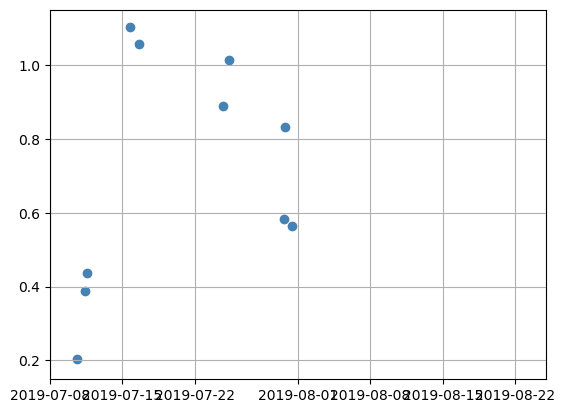

In [50]:
#Example for simple result at gate P5-P3 for all injections
fig = figure()
pygui(false)
P_up = "P5"
P_dwn = "P3"

 for j in 1:35  #nomber of injection 
    if velocity(j,P_up,P_dwn) !== nothing
    v = velocity(j,P_up,P_dwn) 
    scatter(v[2],v[1], color="steelblue")
     end      
 end
xlim(DateTime(2019,7,8),DateTime(2019,8,25))
grid(true)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

## All velocities

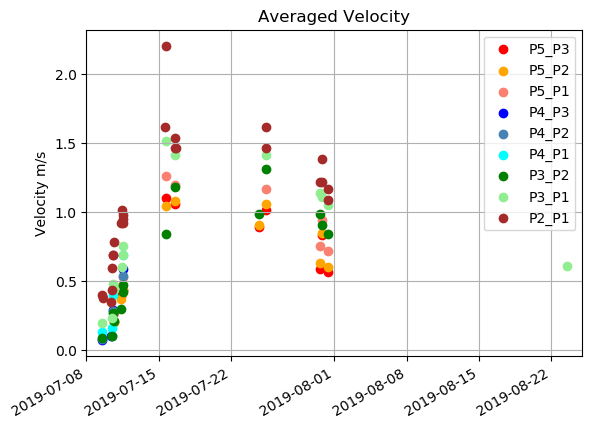

PyObject <matplotlib.legend.Legend object at 0x000000004F4D7E80>

In [51]:
fig = figure()

#from P5
scatter(P5_P3[!,1],P5_P3[!,2], color = "red", label = "P5_P3")
scatter(P5_P2[!,1],P5_P2[!,2], color = "orange", label = "P5_P2")
scatter(P5_P1[!,1],P5_P1[!,2], color = "salmon", label = "P5_P1")

#from P4
scatter(P4_P3[!,1],P4_P3[!,2], color = "blue", label = "P4_P3")
scatter(P4_P2[!,1],P4_P2[!,2], color = "steelblue", label = "P4_P2")
scatter(P4_P1[!,1],P4_P1[!,2], color = "cyan", label = "P4_P1")

#from P3
scatter(P3_P2[!,1],P3_P2[!,2], color = "green", label = "P3_P2")
scatter(P3_P1[!,1],P3_P1[!,2], color = "lightgreen", label = "P3_P1")

#from P2
scatter(P2_P1[!,1],P2_P1[!,2], color = "brown", label = "P2_P1")


xlim(DateTime(2019,7,8),DateTime(2019,8,25))
grid(true)
title("Averaged Velocity")
ylabel("Velocity m/s")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
legend()

# Wetted cross section

Knowing the averaged velocity $V$ and discharge $Q$ between two gates, we obtain the cross section averaged within these gates $S$:

$S = Q/V$


**Import discharge from homhenization time series**

In [52]:
d, head = readdlm(path_products*"discharge_channel_hourly.csv" , ',', header=true);
qp3_hour = d[:,2];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

**Import discharge from salt dilution**

In [53]:
d, head = readdlm(path_products*"discharge_P1.csv" , ',', header=true);
Qs1 = d[:,2];
Qs1_err = d[:,3];
ts1 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"discharge_P2.csv" , ',', header=true);
Qs2 = d[:,2];
Qs2_err = d[:,3];
ts2 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"discharge_P3.csv" , ',', header=true);
Qs3 = d[:,2];
Qs3_err = d[:,3];
ts3 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

## Cross section P5-P3

In [54]:
v = vcat(P5_P3[!,2])
t = vcat(P5_P3[!,1])

cross_s53 = []
cross_t53 = []

for i in eachindex(v)
    
    tt = findfirst(x -> x == round((t[i]), Dates.Hour), round.(ts3, Dates.Hour))
    
    if tt !== nothing
    s = Qs3[tt] / v[i]
    push!(cross_s53,s) 
    push!(cross_t53,t[i])
    end
end

## Cross section P3-P2

In [55]:
v = vcat(P3_P2[!,2])
t = vcat(P3_P2[!,1])

cross_s32 = []
cross_t32 = []

for i in eachindex(v)
    
    tt = findfirst(x -> x == round((t[i]), Dates.Hour), round.(ts2, Dates.Hour))
    
    if tt !== nothing
    s = Qs2[tt] / v[i]
    push!(cross_s32,s) 
    push!(cross_t32,t[i])
    end
end

## Cross section P2-P1

In [56]:
v = vcat(P2_P1[!,2])
t = vcat(P2_P1[!,1])

cross_s21 = []
cross_t21 = []

for i in eachindex(v)
    
    tt = findfirst(x -> x == round((t[i]), Dates.Hour), round.(ts1, Dates.Hour))
    
    if tt !== nothing
    s = Qs1[tt] / v[i]
    push!(cross_s21,s) 
    push!(cross_t21,t[i])
    end
end

## Cross section P5_P1 

In [57]:
v = vcat(P5_P1[!,2])
t = vcat(P5_P1[!,1])

cross_s51 = []
cross_t51 = []

for i in eachindex(v)
    
    tt = findfirst(x -> x == round((t[i]), Dates.Hour), t3_hour)
    
    if tt !== nothing
    s = qp3_hour[tt] / v[i]
    push!(cross_s51,s) 
    push!(cross_t51,t[i])
    end
end

## Plot wetted cross section 

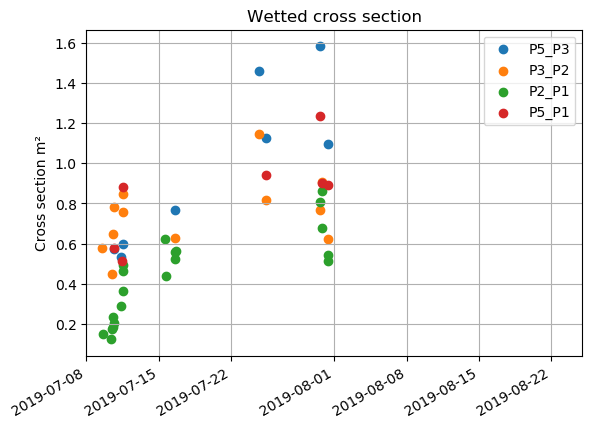

PyObject <matplotlib.legend.Legend object at 0x000000004ECC3780>

In [58]:
fig = figure()

scatter(cross_t53,cross_s53, label = "P5_P3")
scatter(cross_t32,cross_s32, label = "P3_P2")
scatter(cross_t21,cross_s21, label = "P2_P1")
scatter(cross_t51,cross_s51, label = "P5_P1")

xlim(DateTime(2019,7,8),DateTime(2019,8,25))
grid(true)
title("Wetted cross section")
ylabel("Cross section m²")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
legend()

# Friction hydraulic factor from Darcy-Weisbach equation

  [Darcy-Weisbach equation](https://en.wikipedia.org/wiki/Darcy%E2%80%93Weisbach_equation):
  
  $$ \frac{\Delta p}{L} = f_r\frac{\rho}{2} \frac{v^2}{D_h} $$   
  
  and **Manning roughness $n$**
  
   $$n' = \sqrt\frac{R_h^{1/3}fr}{8g}$$
  
  with:
  
  - $f_r$ = friction factor
  - $\Delta p = \rho * g * \Delta h $, $\Delta h$ = pressure head loss (elevation + water height)
  - $L$ = canal length
  - $v$ = averaged velocity along L
  - $D_h = 2\sqrt\frac{A}{\pi}$ = hydraulic diameter (for a pipe of wetted cross section area A)

## Friction factor function - General case

In [59]:
"""
    friction(injection, station_1, station_2, cross_section)

Calculate the friction factor between 2 station for a given salt injection experiment (where velocity
and cross section are available).

For a first approximation, pressure head loss is assumed to be equal to elevation change only, i.e the water heigth
difference is assumed to be zero. This error of few tens cm propagates little on the slope, since the horizontal 
distance of about hundreds meters.

Imput:
-injection -- type integer: Identitie of injection, from 1 to 35, refers to injections array
-station_1 -- type string: up stream station = P1, P2... 
-station_1 -- type string: down stream station = P1, P2...
-cross section -- type string: the cross section shape considered for hydraulic diameter calculation (pipe or retangular by default)


Hidden imput:
-canal length
-canal elevation and water height
-discharge
-uncertaities associated

calculs:

-velocity by calling velocity function
-wetted cross section aera 
-slope
-hydraulic diameter using te cross section shape hypothesis. 


Output:
- friction factor 

"""

#EASIER?? to associate ONE channel elevation per day (No linear interpolation). And maybe to propagate errors of few 
#tens cm in the calcul. I guess such errors are pretty low regarding the horizontal distance.


function friction(inj, P_up, P_dwn, shape = "rect")  #by default shape = rect
    
    gr = 9.81 #gravitationnal constant

    v = velocity(inj, P_up, P_dwn)[1]; #velocity integrated
    tv = velocity(inj, P_up, P_dwn)[2]; #time of injection at P_dwn
    
    #date -> decimal translation to get the channel bottom elevation from interpolated times series
    t_dec = datetime2decimal(tv)  # = nbr of day after the 9th July 
                                
    
    
    #select the associated discharge from salt dilution experiments and the pressure head down stream: h2
        
    #ADD P4 as it was some reccord there around 10th July?
        
    if P_dwn == "P3" 
        Q = Qs3
        Q_err = Qs3_err
        tq = ts3
        z2 = y3_interp(t_dec)  #error message if t_dec if not within y_interp range ??!!
        
    elseif P_dwn == "P2"
        
        Q = Qs2
        Q_err = Qs2_err
        tq = ts2
        z2 = y2_interp(t_dec)
        
    elseif P_dwn == "P1"
        
        Q = Qs1
        Q_err = Qs1_err
        tq = ts1
        z2 = y1_interp(t_dec)
        
    end
    
    #pressure head up-stream: h1
    
    if  P_up == "P5"
        
        z1 = y5_interp(t_dec)
            
    elseif P_up == "P3"
        
        z1 = y3_interp(t_dec)
        
    elseif P_up == "P2"
        
        z1 = y2_interp(t_dec)
        
    elseif P_up == "P1"
        
        z1 = y1_interp(t_dec)        
    end

    
        
    
    #To associate discharge measurements to velocity measurement at time tv
    tt = findfirst(x -> x == floor(tv, Dates.Hour) , floor.(tq, Dates.Hour))  #we round to be sure to match
    ## Achtung: Floor = round t down: but could be tv = 13:58 -> 13:00 and tq = 14:02 -> 14:00
    
    if tt !== nothing
        
   
        #error :
        #discharge: std deviation already calculated
        #velocity : ? go back to velocity function ?
        #distance = 2m (also because sensors were a bit more dowstream that the station itself)
        #elevation = 1m (take into account the no- water height consideration)
        
   
        #Wetted cross section
        A = (Q[tt] ± Q_err[tt])  / v
        
        #Pressure head loss (channel slope, without considering water height expet for P5-P3)
        slope = ((z1 - z2) ± 0.5)/ (dist[P_dwn] - dist[P_up] ± 2)
        
        #Hydraulic radius for rectangular duct
        w = 2 ± 0.5 #width (m) 
        h = A/w #water height (rectangular side)
        Dr = 4*A / (2*h + w) 
        
        #hydraulic diameter for pipe of cross sectional area A
        #https://en.wikipedia.org/wiki/Darcy%E2%80%93Weisbach_equation
        D = 2 * sqrt(A / pi)
        

        #Friction factor
        if shape == "pipe"
            
            f = gr*slope*2*D/v^2
               
        elseif shape == "rect"
        
            f = gr*slope*2*Dr/v^2
            
        end
            
        return f,tv,h  
        
     elseif tt == nothing
            
            error("DateTime velocity doesn't match DateTime discharge")
            
    end
    
    
end

friction (generic function with 2 methods)

## Friction factor and manning roughness function for P5-P3 (where field measurements are the most accurate)

In [60]:
"""
friction53(injection, cross section)

Calculate the friction factor between P5-P3 station for a given salt injection experiment (where velocity
and cross section are available). The key argument "cross section" determine if water stage or width is taken
for the wetted perimeter calculation (rectangular cross section).

Imput:
-injection -- type integer: Identitie of injection, from 1 to 35, refers to injections array
- c -- type string: "h" means that water heigh (or stage) is given in the calcul of hydraulic diameter. "w" means that 
the width is given as imput.

Hidden imput:
-canal length
-canal elevation and water height
-discharge
-uncertaities associated

calculs:

-velocity by calling velocity function
-wetted cross section aera 
-slope
-hydraulic diameter using rectangular cross section hypothesis
- maning roughness

Output:
- friction factor 
- time when velocity is computed
- water height (if c=w from hydraulic radius formula)
- channel width (if c= h: from hydraulic radius formula)
- manning roughness

"""

function friction53(inj, c="h") 
    
    gr = 9.81 #gravitationnal constant
    v = velocity(inj, "P5", "P3")[1]; #velocity integrated
    tv = velocity(inj, "P5", "P3")[2]; #time of injection at P_dwn
    
    #To associate channel bottom elevation at time tv 
    #There is only a measure a day, such that floor at day scale is OK
    t_z5 = findfirst(x -> x == floor(tv, Dates.Day), floor.(x5, Dates.Day))
    z5 = y5[t_z5] ± 0.1
    t_z3 = findfirst(x -> x == floor(tv, Dates.Day), floor.(x3, Dates.Day))
    z3 = y3[t_z3] ± 0.1
    
    #To associate water stage at time tv 
    t_h5 = findfirst(x -> x == floor(tv, Dates.Day) , floor.(t_stage5, Dates.Day))
    h5 = stage5[t_h5] ± stage5_err[t_h5]  
    #2 water stage the 11, but similar value= floor at day scale is OK
    t_h3 = findfirst(x -> x == floor(tv, Dates.Day) , floor.(t_stage3, Dates.Day))
    h3 = stage3[t_h3] ± stage3_err  #stage3_err is one single value   
      
    
    #To associate discharge measurements to velocity measurement at time tv
    tt = findfirst(x -> x == floor(tv, Dates.Hour) , floor.(ts3, Dates.Hour))  #we round to be sure to match
    ## Achtung: Floor = round t down: but could be tv = 16:58 -> 16:00 and tq = 17:01 -> 17:00
    #this is what happen for the 24 July
    
    if tt !== nothing
        
        #error :
        #discharge: std deviation already calculated
        #velocity : no uncertainties -> should we go back to velocity function ?
        #distance = 2m (also because sensors were a bit more dowstream that the station itself)
        #elevation = 0.1m
        #stage = stage_err (5cm to 20cm)
        #width = 0.5m
        
   
        #Wetted cross section
        A = (Qs3[tt] ± Qs3_err[tt]) / v
        
        #Pressure head loss 
        slope = (z5 + h5 - z3 + h3)/ (dist["P3"] - dist["P5"] ± 2)
        
        #Hydraulic radius for rectangular duct
        
        if c == "w"  #forcing w, adjust h
            w = 2 ± 0.5 #width (m) 
            h = A/w #water height (rectangular side)
            
        elseif c == "h" #By default: forcing h, adjust w : makes more sens as we have better constrain on h ? 
            h = (h5 + h3)/2  
            w = A/h
        end
        
        Dr = 4*A / (2*h + w) 
        
        #Friction factor
        f = gr*slope*2*Dr/v^2
        
        #Manning roughness
        Rh = Dr/4 #hydraulic radius
        n = sqrt(abs(Rh^(1/3)*f)/(8*g)) 
            
        return f,tv, h, w, n, Rh
        
     elseif tt == nothing
            
            error("DateTime velocity doesn't match DateTime discharge")
            
    end
    
    
end

friction53 (generic function with 2 methods)

## Import channel elevation

In [61]:
x = Dict{}()
y = Dict{}()
y_std = Dict{}()
for s in [1,2,3,4,5]
    d,head = readdlm(path_data*"Channel_elevation/P$(s)_channel_elevation.csv" , ';', header=true)
    x[s] = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]
    y[s] = d[:,2];
    y_std[s] = d[:,3];
end
#Because the folowing code don't take the Dictionarry (todo later) , we write:
#P1
x1,y1 = x[1],y[1]
#P2
x2,y2 = x[2],y[2]
#P3
x3,y3 = x[3],y[3]
#P4
x4,y4 = x[4],y[4]
#P5
x5,y5 = x[5],y[5];

### Interpolation of channel elevation (imported from `geometry.ipynb` )

In [62]:
#creation of x1 datetime into decimal
x1_dec = [round(datetime2decimal(x), digits = 3) for x in x1]
#interpolation within the range
y1_interp = LinearInterpolation(x1_dec, y1);
#P2,P3,P5
x2_dec = [round(datetime2decimal(x), digits = 3) for x in x2]
y2_interp = LinearInterpolation(x2_dec,y2);
x3_dec = [round(datetime2decimal(x), digits = 3) for x in x3]
y3_interp = LinearInterpolation(x3_dec,y3);
x5_dec = [round(datetime2decimal(x), digits = 3) for x in x5]
y5_interp = LinearInterpolation(x5_dec,y5);
#todo: create dictionarry with station as keys

### Preparation and "customisation" of water stage data 

In [63]:
#Validation stage from field measurements
t_stage3=[DateTime(2019,7,8,12,30),DateTime(2019,7,8,14,40),DateTime(2019,7,9,14,35),
    DateTime(2019,7,10,14,5),DateTime(2019,7,11,10,10),DateTime(2019,7,11,12,35), DateTime(2019,7,16,13,17),DateTime(2019,7,25,9,48),
    DateTime(2019,7,30,13,20),DateTime(2019,8,8,12),DateTime(2019,8,14,9,45),DateTime(2019,8,23,12,46),DateTime(2019,9,4,9,54)]
stage3=[0.09,0.08,0.18,0.23,0.23,0.3,0.35,0.55,0.5,0.4,0.3,0.33,0.1];
stage3_err=0.05

t_stage5=[DateTime(2019,7,10,12,42), DateTime(2019,7,10,14,57),DateTime(2019,7,16,14),
    DateTime(2019,7,25,10,28),DateTime(2019,7,30,14,31),
DateTime(2019,7,31,10,26),DateTime(2019,8,8,12,57),DateTime(2019,8,14,10,14),
    DateTime(2019,8,23,13,50)]
stage5=[1,1,0.6,0.65,0.6,0.45,0.5,0.3,0.2];


#Let's add the missing value for 11 July for stage5 (from deduction) and 31 july for stage3 (from pressure sensor).
#By doing this we add the missing equation menbers to complete friction factor for those 2 days!

push!(t_stage5, DateTime(2019,7,11),DateTime(2019,7,11) )#second value
push!(stage5, 0.8, 0.8) #We estimate the water height = 0.8m the 11 (between 1 and 0.6 the 15)
#uncertaities are higher for those two = 0.2m

push!(t_stage3, DateTime(2019,7,31,9,30))
push!(stage3, 0.38) #from pressure sensor which was well located in channel bottom

#Errors on stage measurements
stage3_err=0.05
stage5_err=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2,0.2];

### A trick to match velocity and discharge datetime in salt injection the 24th July.... 
**Actually useless because there is no water stage measurements available the 24...**

In [64]:
## As we will see, the function associate the velocity datetime to discharge datetime measurement
#with a floor rounding
# The 24 July the matching fail between ts3 (discharge) and tv (velocity): because it is not within the same hour
#So we manually change the DateTime of the measurement, no consequence on others computation, but
#it makes my like easier =)
ts3[12] = DateTime(2019,7,24,17);
#like this floor tv = floor ts3 = 17h

#BUT actually there is no water stage measurement the 24 (sensor out of water, and no probing)

## TESTS

In [65]:
i = 21
P_up = "P5"
P_dwn = "P3"

fr = friction(i, P_up, P_dwn)

(0.0999 ± 0.04, DateTime("2019-07-16T14:12:10"), 0.414 ± 0.15)

In [66]:
fr = friction53(i,"w")

(0.171 ± 0.021, DateTime("2019-07-16T14:12:10"), 0.415 ± 0.15, 2.0 ± 0.5, 0.0376 ± 0.0028, 0.274 ± 0.027)

# Friction factor and Manning roughness between P5 and P3 - Results in Table 3

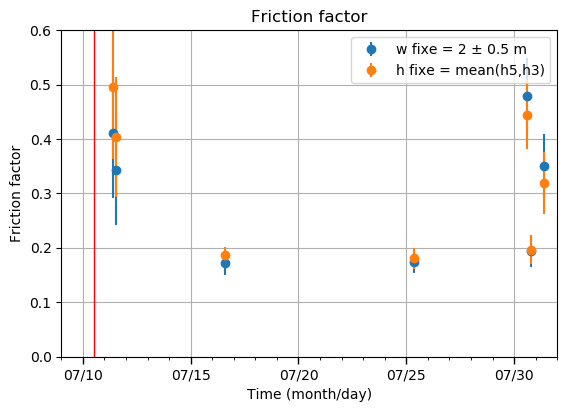

In [67]:
#  w = 2 ± 0.5 m is given in the Dh calculation
ffw_53 = []
tf_53 = []
h_53 = []
nw_53 = []
R_w_53 = []

for i in 1:35
        try f = friction53(i, "w")  
        push!(ffw_53, f[1])
        push!(tf_53, f[2])
        push!(h_53, f[3])
        push!(nw_53, f[5])
        push!(R_w_53, f[6])
        catch e
        end   
end

#h is given in the Dh calculation as the mean between h5 and h3.
ffh_53 = []
tf_53 = []
w_53 = []
nh_53 = []
R_h_53 = []

for i in 1:35
        try f = friction53(i, "h")  
        push!(ffh_53, f[1])
        push!(tf_53, f[2])
        push!(w_53, f[4])
        push!(nh_53, f[5])
        push!(R_h_53, f[6])
        catch e
        end   
end



fig = figure()
errorbar(tf_53, mean.(ffw_53), std.(ffw_53), linestyle = "", marker = "o", label = "w fixe = 2 ± 0.5 m")
errorbar(tf_53, mean.(ffh_53), std.(ffh_53), linestyle = "", marker = "o", label = "h fixe = mean(h5,h3)")

ylabel("Friction factor")
xlabel("Time (month/day)")
title("Friction factor")
legend()
grid(true)
ylim(0,0.6)
xlim(DateTime(2019,7,9), DateTime(2019,8,1))
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")

majorformatter = matplotlib.dates.DateFormatter("%m/%d")
majorlocator   = matplotlib.dates.DayLocator(bymonthday=(5,10,15,20,25,30))
minorlocator   = matplotlib.dates.DayLocator(interval=1)
ax = gca()
ax.xaxis.set_major_formatter(majorformatter)
ax.xaxis.set_major_locator(majorlocator)
ax.xaxis.set_minor_locator(minorlocator)
ax.xaxis.set_tick_params(which="major",length=5,width=1,labelsize=10)
fig[:autofmt_xdate](bottom=0.2,rotation=0,ha="center")

#savefig(path_plots*"friction53.png")

In [68]:
# mean(ffw_53[2:end]) is not the relevant mean when using particules!

In [69]:
#real mean
mean(mean.(ffw_53[2:end])) ± std(mean.(ffw_53[2:end]))

Particles{Float64,2000}
 0.303211 ± 0.124

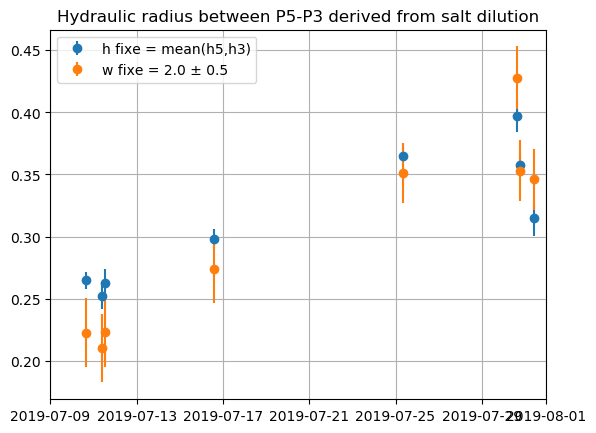

PyObject <matplotlib.legend.Legend object at 0x000000004EDBBB38>

In [70]:
#Hydraulic radius
w = 2 ± 0.5 #width (m)
errorbar(tf_53,mean.(R_h_53),std.(R_h_53), linestyle = "", marker = "o", label = "h fixe = mean(h5,h3)") 
errorbar(tf_53,mean.(R_w_53),std.(R_w_53), linestyle = "", marker = "o", label = "w fixe = $w") 
title("Hydraulic radius between P5-P3 derived from salt dilution")
xlim(DateTime(2019,7,9), DateTime(2019,8,1))
grid(true)
legend()

In [71]:
tf_53

8-element Array{Any,1}:
 2019-07-10T15:35:25
 2019-07-11T09:27:05
 2019-07-11T12:51:40
 2019-07-16T14:12:10
 2019-07-25T08:44:25
 2019-07-30T14:47:15
 2019-07-30T18:34:05
 2019-07-31T09:39:30

In [72]:
println(R_w_53)

Any[0.222 ± 0.028, 0.21 ± 0.028, 0.223 ± 0.028, 0.274 ± 0.027, 0.351 ± 0.024, 0.428 ± 0.025, 0.353 ± 0.025, 0.346 ± 0.025]


In [73]:
println(tf_53)

Any[DateTime("2019-07-10T15:35:25"), DateTime("2019-07-11T09:27:05"), DateTime("2019-07-11T12:51:40"), DateTime("2019-07-16T14:12:10"), DateTime("2019-07-25T08:44:25"), DateTime("2019-07-30T14:47:15"), DateTime("2019-07-30T18:34:05"), DateTime("2019-07-31T09:39:30")]


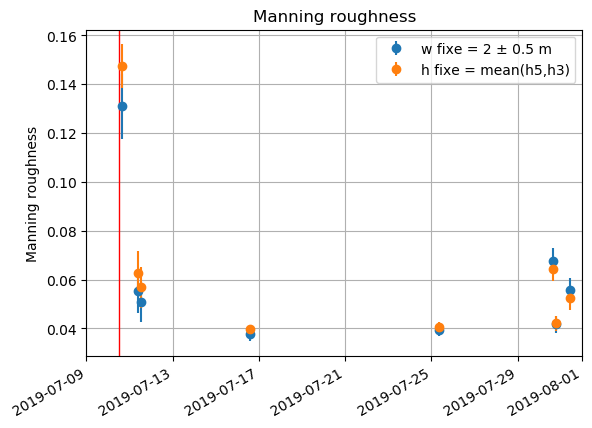

In [74]:
#Manning roughness
fig = figure()
errorbar(tf_53, mean.(nw_53), std.(nw_53), linestyle = "", marker = "o", label = "w fixe = 2 ± 0.5 m")
errorbar(tf_53, mean.(nh_53), std.(nh_53), linestyle = "", marker = "o", label = "h fixe = mean(h5,h3)")

ylabel("Manning roughness")
title("Manning roughness")
legend()
grid(true)
#ylim(0,0.6)
xlim(DateTime(2019,7,9), DateTime(2019,8,1))
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

In [75]:
nw_53

8-element Array{Any,1}:
 0.131 ± 0.013
 0.0552 ± 0.009
 0.0509 ± 0.0083
 0.0376 ± 0.0028
 0.0395 ± 0.0026
 0.0676 ± 0.0053
 0.0417 ± 0.0034
 0.0558 ± 0.005

In [76]:
#mean(nw_53[2:end]) is not the relevant mean when using particles

In [77]:
#real mean
mean(mean.(nw_53[2:end])) ± std(mean.(nw_53[2:end]))

Particles{Float64,2000}
 0.0497482 ± 0.0108

# Discussion about large uncertainties on some values 

**10 July**  this friction value is not relevant (around 2.5). because the channel geometry is not yet etablished, drainage just initiated. See stage at P5 (around 1 meter) and channel elevation profile.

**11 july** These 2 friction factors have larger uncertaities: we don't have stage measurement at P5 (sensor floating, and no probing). I thus took the mean between the stage of 10 July (1m) and the 16 July (0.6m), which is 0.8 ± 0.2 (high uncertainties). Plus: the geometry of channel is not well constrained as it changes fast

**30 july AM and 31 July** Those 2 value fail the validation test when fixing width at 2 meters: the water stage derived from Dh calculation using 2-m width is irealistic (see next plot bellow). However, when we fix w=3m then water stage match pretty well with observations. Moreover, when we take a look at the width when we fix water stage as an average between h5 and h3, we find indeed that width for those those values would be around 2.5/3 m. By consequences, we suspect larger uncertainties for this two values.





# Validation of cross section hypothesis using `friction53`

In the function `friction53` we had to make assumption either on the mean water stage (c="h"), either on the mean width (c="w") to compute the hydraulic diameter. Here we compare and assess the two options.

## Forcing water stage 

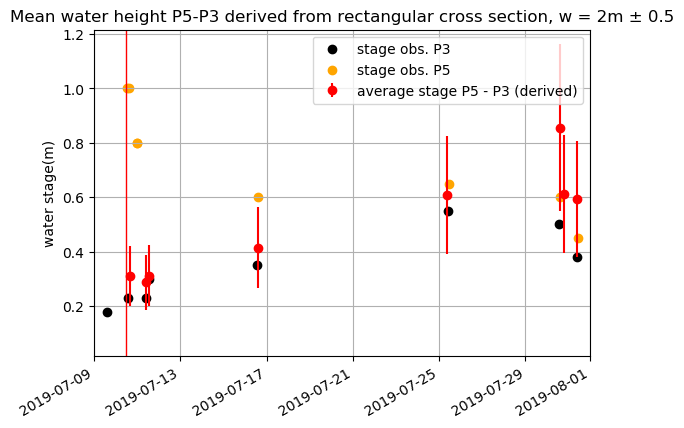

In [78]:
fig = figure()
pygui(false)

errorbar(tf_53, mean.(h_53), std.(h_53), color = "red", linestyle = "", marker = "o", label = "average stage P5 - P3 (derived)")
scatter(t_stage3,stage3, color = "black", label = "stage obs. P3")
scatter(t_stage5, stage5, color = "orange", label = "stage obs. P5")
ylabel("water stage(m)")
title("Mean water height P5-P3 derived from rectangular cross section, w = 2m ± 0.5")
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
xlim(DateTime(2019,7,9), DateTime(2019,8,1))
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
legend()
grid(true)

## Forcing width

In [79]:
width_p3 = [1, 1.6, 2.3 ]
t_w3 = [DateTime(2019,7,9,14,35), DateTime(2019,7,16,13,17), DateTime(2019,7,25,9,48)]

width_p5 = [1, 2.69, 2.97, 3.15, 0.55 ]
t_w5 = [DateTime(2019,7,9,14,35), DateTime(2019,7,25,10,28), DateTime(2019,7,31,10,26), DateTime(2019,8,8,12,57), DateTime(2019,9,4,10,2)];

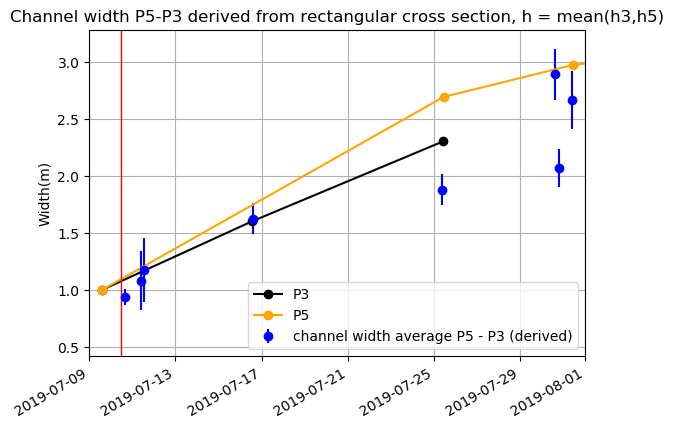

In [80]:
fig = figure()
pygui(false)

errorbar(tf_53, mean.(w_53), std.(w_53), color = "blue", linestyle = "", marker = "o", label = "channel width average P5 - P3 (derived)")
plot(t_w3,width_p3, marker="o", label="P3", color = "black")
plot(t_w5,width_p5, marker="o", label="P5", color = "orange")
ylabel("Width(m)")
title("Channel width P5-P3 derived from rectangular cross section, h = mean(h3,h5)")
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
xlim(DateTime(2019,7,9), DateTime(2019,8,1))
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
legend()
grid(true)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

# Should we use w-fix or h-fix ?

That is the same for the 3 friction factor of 0.2 because for those cases we validated the two hypothesis. 

For the others (higher factor), it seems that fixing the width is on better aggrement with stage field observations. Whereas when we fix the water stage (as the mean between P5 and P3), the derived width are in bad agreement regarding field observations.

We thus take into consideration a constant width of 2 +- 0.5 meters.

## Computation of all friction factor `ff` over different channel segments. But we don't use them: too large uncertainties on channel geometry and water stage

In [81]:
#All segemt are represented:
 
#P5-P1
ff_51 = []
tf_51 = []
h_51 = []

for i in 1:35
        try f = friction(i, "P5", "P1")  #`try` allow to pass errors like if it deos not matter and go ahead
        
        push!(ff_51, f[1])
        push!(tf_51, f[2])
        push!(h_51, f[3])
        
        catch e
        end   
    #for P5-P1 : 12, 14, 17, 19, 21, (26 no?), 28, 30, 32  
end

#P5-P2
ff_52 = []
tf_52 = []

for i in 1:35
        try f = friction(i, "P5", "P2")  
        push!(ff_52, f[1])
        push!(tf_52, f[2])
        
        catch e
        end   
end
#P5-P2 pipe
ff_52_p = []
tf_52_p = []

for i in 1:35
        try f = friction(i, "P5", "P2", "pipe")  
        push!(ff_52_p, f[1])
        push!(tf_52_p, f[2])
        
        catch e
        end   
end


#P3-P1
ff_31 = []
tf_31 = []

for i in 1:35
        try f = friction(i, "P3", "P1")  
        push!(ff_31, f[1])
        push!(tf_31, f[2])
        
        catch e
        end   
end

#P3-P2
ff_32 = []
tf_32 = []

for i in 1:35
        try f = friction(i, "P3", "P2")  
        push!(ff_32, f[1])
        push!(tf_32, f[2])
        
        catch e
        end   
end

#P2-P1
ff_21 = []
tf_21 = []

for i in 1:35
        try f = friction(i, "P2", "P1")  
        push!(ff_21, f[1])
        push!(tf_21, f[2])
        
        catch e
        end   
end



In [82]:
##Plot of friction factor using friction on others stations  
##We don't use them: to large uncertainties on channel geometry and wtaer stage
#fig = figure()
#pygui(false)

#errorbar(tf_51, mean.(ff_51), std.(ff_51), linestyle = "", marker = "o", label = "P5 - P1")
#errorbar(tf_52, mean.(ff_52), std.(ff_52), linestyle = "", marker = "o", label = "P5 - P2")
#errorbar(tf_31, mean.(ff_31), std.(ff_31), linestyle = "", marker = "o", label = "P3 - P1")
#errorbar(tf_32, mean.(ff_32), std.(ff_32), linestyle = "", marker = "o", label = "P3 - P2")
#errorbar(tf_21, mean.(ff_21), std.(ff_21), linestyle = "", marker = "o", label = "P2 - P1")


#ylabel("Friction factor")
#title("Friction factor, w = 2m, cross section rect.")
#legend()
#grid(true)
#ylim(-0.1,0.5)
#xlim(DateTime(2019,7,9), DateTime(2019,8,1))
#axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
#fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

#savefig(path_plots*"friction_factor_all") 

## Assessemnt on the cross section geometry hypothesis  (rectangular or elliptic) between P5-P3 on the calculation of $D_H$ 

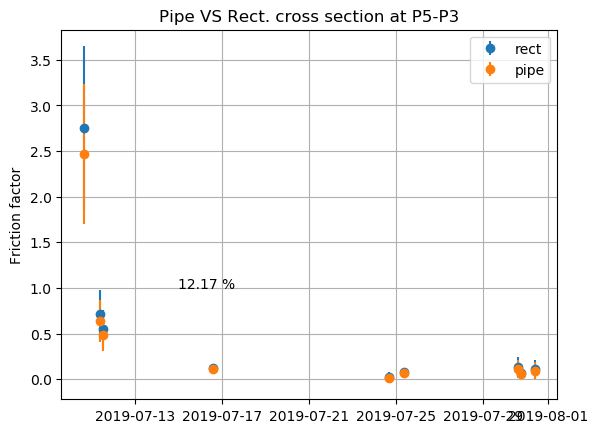

PyObject Text(24.000000000000007, 0.5, 'Friction factor')

In [83]:
errorbar(tf_52,mean.(ff_52),std.(ff_52), linestyle="", marker="o", label="rect")
errorbar(tf_52_p,mean.(ff_52_p),std.(ff_52_p), linestyle="", marker="o", label="pipe")
grid(true)
legend()
title("Pipe VS Rect. cross section at P5-P3")
err = round(mean((mean.(ff_52) - mean.(ff_52_p))./mean.(ff_52)*100), digits=2)
text(DateTime(2019,7,15), 1, "$err %")
ylabel("Friction factor")

In [84]:
#The difference is quite low, in average 12%
(mean.(ff_52) - mean.(ff_52_p))./mean.(ff_52)*100

9-element Array{Float64,1}:
 10.340076455166237
  9.957490297438817
 11.665768134823416
  7.7261940175068755
 15.588046336872049
 13.584899154689905
 15.466489772170592
 13.356816751547104
 11.820774484450485

## An assessment on channel bottom elevation interpolation relevance

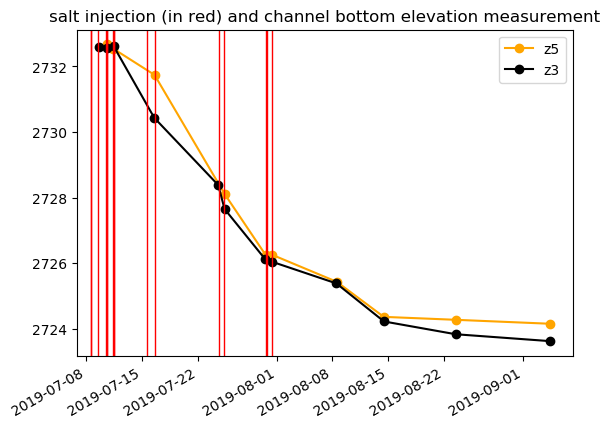

In [85]:

fig = figure()
pygui(false)
plot(x5,y5, marker = "o", color = "orange", label = "z5")
plot(x3,y3, marker = "o", color = "black", label = "z3")

for i in 1:length(ts3)
axvline(x=ts3[i],linewidth=1,color="r")
end
title("salt injection (in red) and channel bottom elevation measurement")
legend()
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")


**Conclusion: Interpolate or not the channel bottom elevation does not make a big difference, since the salt injection time are close to the channel elavation measurements (=same field visit). That means that we can associate channel elevation measurement to discharge from salt injection, with few cm of erros at maximum only**

**It would be usefull for the 15 July, but we don't compute $f_D$ at this date (lack of stage measurement), same issue with 24 July**

## Friction factor `ffw_53` and Manning roughness `nw_53` in a CSV file (Table 3)

In [86]:
#We remove the first value (10 July) because it is wrong (see explanation further above)

#Friction factor
df=DataFrame(Date_Time = tf_53[2:end], Friction_factor = round.(mean.(ffw_53[2:end]), digits=3), 
    std_dev = round.(std.(ffw_53[2:end]),digits=3));
CSV.write(path_products*"Friction_factor_P5_P3.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")
#Manning roughness
df=DataFrame(Date_Time = tf_53[2:end] , Manning_roughness = round.(mean.(nw_53[2:end]),digits=3),
    std_dev = round.(std.(nw_53[2:end]),digits=3));
CSV.write(path_products*"Manning_roughness_P5_P3.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");


# Thermodynamics 

# Heat Transfer

 The melt rate $m$ (m/s) at the bottom of the channel can be written as (Vincent et al, 2010):
 
 **(1)** $$ m = \frac{q_c}{\rho_i[L_f + c_i(\theta_f - \theta_i)]} $$ 
  
 with 
 
- $ρ_i$: ice density
- $c_i$: specific heat of ice
- $θ_f$: temperature of fusion (assumed to be 0 degree)
- $θ_i$: temperature of ice (assumed to be 0 degree)
- $q_c$: heat flux at water/ice interface. Unit is **W/m²** 

**(2)** $$ q_c = h_t(\theta_w - \theta_f) $$ 

with $h_t$ the heat transfer coeficient **(W/m²C)**

**(3)** $$  ht = \frac{Nu}{k_w \lambda} $$ 


- $Nu$ is Nusselt Number
- $k_w$ is thermal conductivity of water (W/mC)
- $\lambda$ is a carecteristic length, considered to be the Hydraulic Diameter (Lunardini and others, 1986)

### Import temperature hourly time series

In [87]:
d, head = readdlm(path_products*"temp1_hour.csv" , ',', header=true);
temp1_hour = d[:,2];
t1_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"temp2_hour.csv" , ',', header=true);
temp2_hour = d[:,2];
t2_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"temp3_hour.csv" , ',', header=true);
temp3_hour = d[:,2];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"temp5_hour.csv" , ',', header=true);
temp5_hour = d[:,2];
t5_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

### Modification of channel bottom elevation time series -> we remove supposedly wrong data

In [88]:
#at P2:
#the 24 July measurement is certainly wrong (elevation is highe than 1 meter than the 25th!! 1 meter of erosion is not
#possible). We keep the 25th value instead the 24 as it seems to better fit the linear trend in erosion rate
#Same for 11th July and 30th July: the elevation is slighty higher than previous day: we remove it. It does not make a big
#difference if we rather keep the 30 or 31 july on heat transfert calcul.

#the increasing order in date bellow matters! Because the array is re-writting with new indices during deleteat process
purge = findfirst(x -> x == DateTime(2019,7,11), floor.(x2, Dates.Day))
if purge !== nothing
deleteat!(x2, purge) 
deleteat!(y2, purge)
end
purge = findfirst(x -> x == DateTime(2019,7,24), floor.(x2, Dates.Day))
if purge !== nothing
deleteat!(x2, purge) 
deleteat!(y2, purge)
end
purge = findfirst(x -> x == DateTime(2019,7,30), floor.(x2, Dates.Day))
if purge !== nothing
deleteat!(x2, purge)
deleteat!(y2, purge);
end     ##Yes... the code is a bit heavy and redundant. But at least it can be re-run without error with nothing values

#at P3:
#24 July is wrong: -80cm in less than one day -> we remove the 24 and keep 25 (better measurement quality)
#and better fit with the linear decrease trend too
purge = findfirst(x -> x == DateTime(2019,7,24), floor.(x3, Dates.Day))
if purge !== nothing
deleteat!(x3, purge) 
deleteat!(y3, purge);
end

11-element Array{Any,1}:
 2732.59
 2732.57
 2732.62
 2730.43
 2727.65
 2726.11
 2726.04
 2725.38
 2724.22
 2723.83
 2723.62

### Erosion rate from daily level water cuts (see `Canal_geometry`)

In [89]:
#daily imprint @P5
#The last daily level cut measurement (30 July) is tuned to match channel bottom elevation (+2726.24)
#As we are interested on the relative melt rate between two measurement, this is allowed
#note: wtaer level cuts are NOT channel bootom elevation but top water surface elevation. So deriveing a melt rate
#from them mean assuming a constant water stage
date_dp5=[DateTime(2019,7,16,14):Day(1):DateTime(2019,7,30,14,31)]
dp5=[5.65,5.2,4.85,4.55,4.25,4,3.6,3.2,2.85,2.35,1.9,1.35,0.75,0.4,0]
zdp5=dp5.+2726.24;
#the errors is estimated to be 10cm

### Uncertainties on temperature measurement (see Temperature Calibration notebook) 

In [90]:
err_temperature53 = 0.05 #uncertainties for P5 and P3 sensors used for heat transfer calculation
err_temperature21 = 0.1; #uncertainties for P5 and P3 sensors used for heat transfer calculation

### Plot Temperature and channel bottom elevation for each stations 

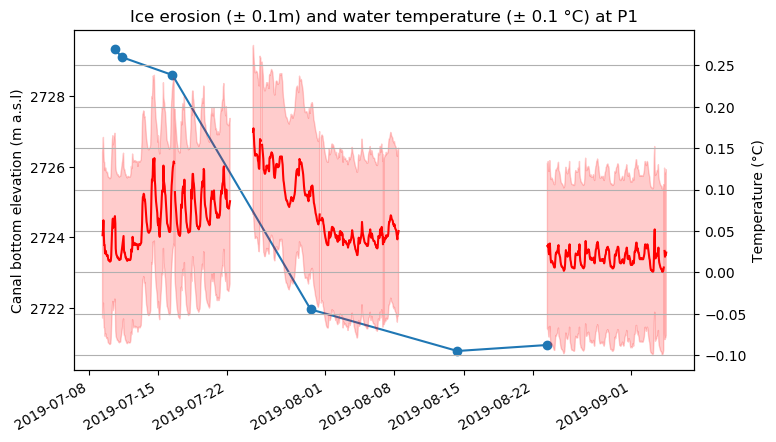

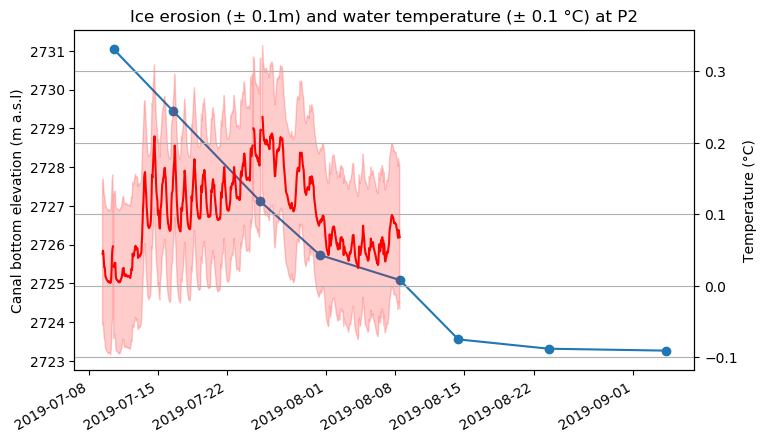

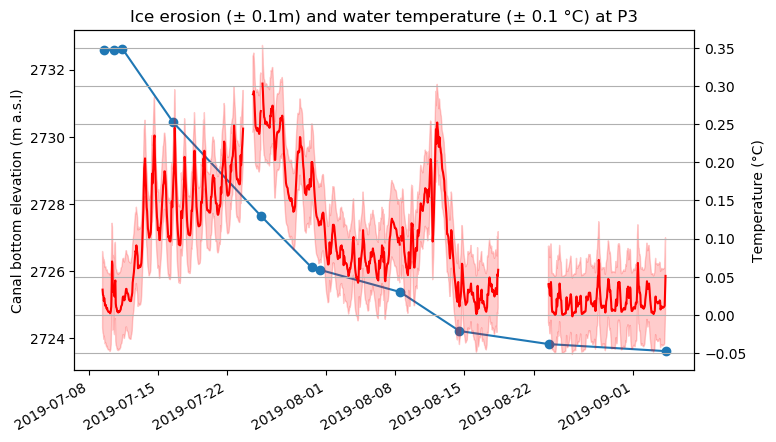

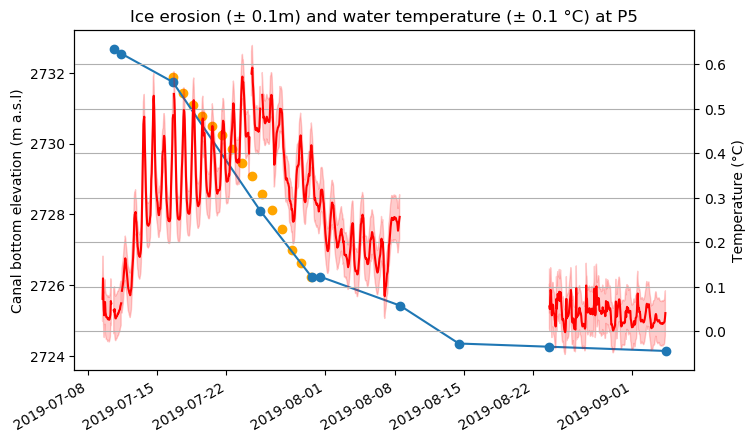

In [91]:
#What we need to compute heat transfert at one gate: temperture and channel bottom elevation time series

#P1
fig, ax = subplots(figsize=(8,5))
errorbar(x1,y1, yerr = 0.1, marker = "o")
ylabel("Canal bottom elevation (m a.s.l)")
ax2 = ax.twinx() # Create another axis on top of the current axis
plot(t1_hour, temp1_hour, color = "r")
grid(true)
fill_between(t1_hour, temp1_hour .- err_temperature21, temp1_hour .+ err_temperature21, color = "r", alpha=0.2)
ylabel("Temperature (°C)")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
title("Ice erosion (± 0.1m) and water temperature (± 0.1 °C) at P1")
savefig(path_plots*"temp and channel elevation at P1") 

#P2
pygui(false)
fig, ax = subplots(figsize=(8,5))
errorbar(x2,y2, yerr = 0.1, marker = "o")
ylabel("Canal bottom elevation (m a.s.l)")
ax2 = ax.twinx() # Create another axis on top of the current axis
plot(t2_hour, temp2_hour, color = "r")
grid(true)
fill_between(t2_hour, temp2_hour .- err_temperature21, temp2_hour .+ err_temperature21, color = "r", alpha=0.2)
ylabel("Temperature (°C)")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
title("Ice erosion (± 0.1m) and water temperature (± 0.1 °C) at P2")
savefig(path_plots*"temp and channel elevation at P2") 

#P3
fig, ax = subplots(figsize=(8,5))
errorbar(x3,y3, yerr = 0.1, marker = "o")
ylabel("Canal bottom elevation (m a.s.l)")
ax2 = ax.twinx() # Create another axis on top of the current axis
plot(t3_hour, temp3_hour, color = "r")
grid(true)
fill_between(t3_hour, temp3_hour .- err_temperature53, temp3_hour .+ err_temperature53, color = "r", alpha=0.2)
#errorbar(t_mean_P3,mean.(temp_mean_P3),yerr = std.(temp_mean_P3),  marker = "o", color = "black")
ylabel("Temperature (°C)")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
title("Ice erosion (± 0.1m) and water temperature (± 0.1 °C) at P3")
savefig(path_plots*"temp and channel elevation at P3") 

#P5
fig, ax = subplots(figsize=(8,5))
errorbar(x5,y5, yerr = 0.1, marker = "o")
scatter(date_dp5, zdp5, marker = "o", color = "orange") #error on daily inprint = 10cm
ylabel("Canal bottom elevation (m a.s.l)")
ax2 = ax.twinx() # Create another axis on top of the current axis
plot(t5_hour, temp5_hour, color = "r")
#errorbar(t_mean_P5,mean.(temp_mean_P5),yerr = std.(temp_mean_P5),  marker = "o", color = "black")
grid(true)
fill_between(t5_hour, temp5_hour .- err_temperature53, temp5_hour .+ err_temperature53, color = "r", alpha=0.2)
ylabel("Temperature (°C)")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
title("Ice erosion (± 0.1m) and water temperature (± 0.1 °C) at P5")
savefig(path_plots*"temp and channel elevation at P5") 



### Import discharge hourly time series  (P3)

In [92]:
d, head = readdlm(path_products*"discharge_channel_hourly_std_deviation.csv" , ',', header=true);
qp3_hourly = d[:,2];
err_qp3_hour = d[:,3];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

### Import discharge full daily time series  (P3) -- To complete Reynolds time series in the July datagap

In [93]:
d, head = readdlm(path_products*"discharge_channel_full_daily.csv" , ',', header=true);
qp3_daily = d[:,2];
t3_daily = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

### Import stage full daily time series  (P3) -- To complete Reynolds time series in the July datagap

In [94]:
d, head = readdlm(path_products*"stage3_full_daily.csv" , ',', header=true);
stage3_daily = d[:,2];
t3_daily = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

## Let's calculate averaged `ht` from channel bottom elevation and water temperature field measurements

In [95]:
"""

heat("P")

Calcule heat transfer coefficient at one station averaged between two channel bottom elevation measurement. 
Unit are W/m²C

output:

- Time when heat transfert is calculated
- Heat transfert coefficient
- Melt rate cm/day
"""
Lf =  333550 #Latent heat of fusion, J/kg
ρi = 917 #Ice density kg/m³


function heat_coeff(P)
    

ht = []  #heat transfer coefficient time series
tf_ht = [] #uppper boud of period
m = []  #melt rate
ti_ht = [] #lower boud of period
tout = [] #mean time of the period (middle point)
avg_temp = [] #averaged temperature used for calculation

if P == "P5"    
        
        d = x5
        z = y5 .± 0.1    #TODO: Uncertinties on elevation are now on csv file, 
                            #they should be directly imported from there
        t_hour = t5_hour
        temp_hour = temp5_hour 
        err_temperature = err_temperature53
        indices = 1:6  #initial time when elevation is measured
        indices_sup = 2:7 #limit superior of measurement available (see ice erosion and water temperature graph above)
        indices_dp = 1:14 #15 daily water level cuts
        indices_dp_sup = 2:15
        
elseif P == "P3"   
        
        d = x3
        z = y3 .± 0.1
        t_hour = t3_hour
        temp_hour = temp3_hour 
        err_temperature = err_temperature53
        indices = [3,4,5,6,7,8,9,10] #because before 11 july elevation are nor relevant (lower than 11th..)
        indices_sup = [4,5,6,7,8,9,10,11]                        
                                      
elseif P == "P2" 
        
        d = x2
        z = y2 .± 0.5
        t_hour = t2_hour
        temp_hour = temp2_hour
        err_temperature = err_temperature21
        indices = 1:3
        indices_sup = 2:4
        
elseif P == "P1" 
        
        d = x1
        z = y1 .± 0.5
        t_hour = t1_hour
        temp_hour = temp1_hour
        err_temperature = err_temperature21
        indices = 1:3
        indices_sup = 2:4
end
        
    
#time where we have channel elevation @P
for (i,j) in zip(indices,indices_sup) # put a condition on length according to gate selected: different length of elevation and temp time series


#We match channel elevation DateTime with temperature time series
t1 = findfirst(x -> x == floor(d[i], Dates.Hour) , floor.(t_hour, Dates.Hour))
t2 = findfirst(x -> x == floor(d[j], Dates.Hour) , floor.(t_hour, Dates.Hour))

#We extract mean temperature between the two dateTime corresponding with the 2 elevation measurement
temp = filter(!isnan, temp_hour[t1:t2]) #We remove the NaN to then calcul the mean
temp = temp .± err_temperature #we add uncertainties on each temperature reccords
temp_mean = sum(temp)/length(temp) 
#I do calculate the mean by this explicit way, because the classic function mean doesn't calculate the ±std deviation associated (or at least I didn't find how)
# update: there is actually value.particles that explicitely write all particles.
#So maybe mean(value.particles) or smth like that should work too ? See in Nu-number-calc-melt.jl
                                    
        
        
#We calculate erosion (m/s) in this time lapse
period = d[j] - d[i]  #period = d[j]- d[i] is the period of averaging
period = convert(Integer, Dates.value.(period/1000)) #Integer, in seconds
melt = (z[i] - z[j])/period

#We now calculate ht

heat = melt*ρi*Lf / temp_mean
        
t = d[j]   #t is the upper bound of the time slot average. 
ti = d[i]
                
push!(ht, heat)
push!(avg_temp, temp_mean)  
push!(tout, ti + (t - ti)/2) #middle_time
push!(tf_ht, t)  #upper bound of period
push!(ti_ht, ti); #lower boud of period
push!(m, melt*60*60*24*100); #cm/day

        
end
    return tf_ht, ht, m, ti_ht, avg_temp, tout
    
end

heat_coeff (generic function with 1 method)

## Heat transfer @P5 derived from daily water level cuts

**Assumption = Difference in water top surface elevation = difference in channel bottom elevation (=water stage constant) = daily melt rate**

In [96]:
"""

heat transfer coefficient at P5 according water level cuts. Using the same scheme than heat function

Calcule heat transfer coefficient at one station averaged between two channel bottom elevation measurement. 
Unit are W/m²C

output:

- Time when heat transfer is calculated
- Heat transfert coefficient
- Melt rate cm/day
"""
  
htdp5 = []
t_htdp5 = []
ti_htdp5 = [] #lower boud of period
mdp5 = []

d = collect(date_dp5[1])
z = zdp5 ± 0.1
t_hour = t5_hour
temp_hour = temp5_hour 
indices_dp = 1:14 #15 daily water level cuts
    
#time where we have channel elevation @P5
for i in indices_dp 

j=i+1

#We match channel elevation DateTime with temperature time series
t1 = findfirst(x -> x == floor(d[i], Dates.Hour) , floor.(t_hour, Dates.Hour))
t2 = findfirst(x -> x == floor(d[j], Dates.Hour) , floor.(t_hour, Dates.Hour))

#We extract mean temperature between the two dateTime corresponding with the 2 elevation measurement
temp = filter(!isnan, temp_hour[t1:t2]) #We remove the NaN to then calcul the mean
temp = temp .± 0.1  #we add uncertainties on each temperature reccords
temp_mean = sum(temp)/length(temp) #I do calculate the mean by this explicit way, because the classic function mean
                                    #doesn't calculate the ±std deviation associated (or at least I didn't find how)
    
#We calculate erosion (m/s) in this time lapse
time = d[j] - d[i]
time=convert(Integer, Dates.value.(time/1000)) #Integer, in seconds
melt = (z[i] - z[j])/time

#We now calculate ht

heat = melt*ρi*Lf / temp_mean
t = d[j]   
ti = d[i]
    
push!(htdp5, heat)
push!(t_htdp5, t)
push!(ti_htdp5, ti)
melt = melt*60*60*24*100 #cm/day
push!(mdp5, melt);

end


In [97]:
#Heat transfer coefficient at P5
t_ht5 = heat_coeff("P5")[1]
ht5 = heat_coeff("P5")[2]
m5 = heat_coeff("P5")[3] #melt rate
ti_ht5 = heat_coeff("P5")[4] #time averaging, in second
temp_mean_P5 = heat_coeff("P5")[5]  #temperature averaged for time period
t_mean_P5 = heat_coeff("P5")[6]  #middle time

#Heat transfer coefficient at P3
t_ht3 = heat_coeff("P3")[1]
ht3 = heat_coeff("P3")[2];
m3 = heat_coeff("P3")[3]
ti_ht3 = heat_coeff("P3")[4]
temp_mean_P3 = heat_coeff("P3")[5]
t_mean_P3 = heat_coeff("P3")[6]

#Heat transfer coefficient at P2
t_ht2 = heat_coeff("P2")[1]
ht2 = heat_coeff("P2")[2];
m2 = heat_coeff("P2")[3]
ti_ht2 = heat_coeff("P2")[4]
t_mean_P2 = heat_coeff("P2")[6]

#Heat transfer coefficient at P1
t_ht1 = heat_coeff("P1")[1]
ht1 = heat_coeff("P1")[2];
m1 = heat_coeff("P1")[3];
ti_ht1 = heat_coeff("P1")[4];
t_mean_P1 = heat_coeff("P1")[6];

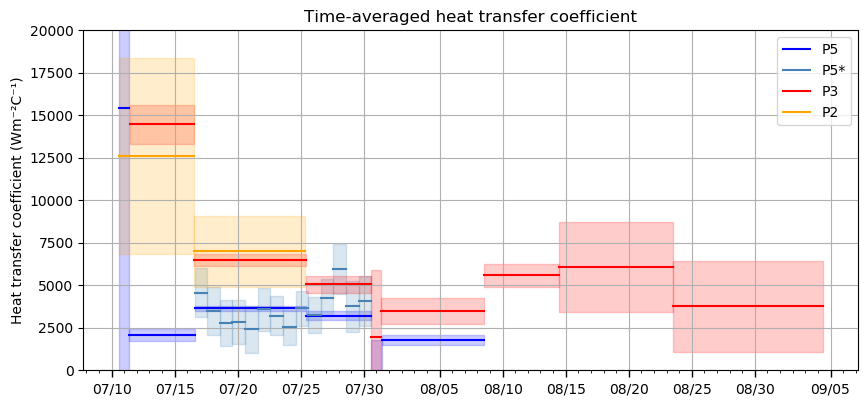

In [98]:
fig = figure(figsize=(10,5))

#P5
for i = 1:length(ht5)
    a=ti_ht5 #time initial of period (lower temporal bound)
    b=t_ht5 #upper bound of period
    c=ht5
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = "P5"    
    else 
        lab=nothing
    end
    plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="b", label=lab)
    fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        [mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "b", alpha=0.2)
    
end

#P5 from daily water level cuts
for i = 1:length(htdp5)
    a=ti_htdp5 #time initial of period (lower temporal bound)
    b=t_htdp5 #upper bound of period
    c=htdp5
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = "P5*" #from daily water level cuts elevation change
    else 
        lab=nothing
    end
    plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="steelblue", label=lab)
    fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        [mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "steelblue", alpha=0.2)
    
end

#P3
for i = 1:length(ht3)  
    a=ti_ht3 #time initial of period (lower temporal bound)
    b=t_ht3 #upper bound of period
    c=ht3
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = "P3"    
    else 
        lab=nothing
    end
    plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="r", label=lab)
    fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        [mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "r", alpha=0.2)
end
    
#P2
for i = 1:length(ht2)-1  
    a=ti_ht2 #time initial of period (lower temporal bound)
    b=t_ht2 #upper bound of period
    c=ht2
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = "P2"    
    else 
        lab=nothing
    end
    plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="orange", label=lab)
    fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        [mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "orange", alpha=0.2)
end

#P1
for i = 1:length(ht1)-1  
    a=ti_ht1 #time initial of period (lower temporal bound)
    b=t_ht1 #upper bound of period
    c=ht1
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = "P1"    
    else 
        lab=nothing
    end
    #plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="green", label=lab)
    #fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        #[mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "green", alpha=0.2)
end


#errorbar(t_ht5, mean.(ht5), std.(ht5), linestyle = "", marker = "o", color = "b", label="P5")
#errorbar(t_htdp5, mean.(htdp5), std.(htdp5), linestyle = "", marker = "o", markersize = 4, color = "blue", label="P5 (daily water level cuts)")
#errorbar(t_ht3, mean.(ht3), std.(ht3), linestyle = "", marker = "o", color = "r", label="P3")
#errorbar(t_ht2, mean.(ht2), std.(ht2), linestyle = "", marker = "o", color = "orange", label="P2")
#errorbar(t_ht1, mean.(ht1), std.(ht1), linestyle = "", marker = "o", color = "green", label="P1")

grid(true)
title("Time-averaged heat transfer coefficient")
ylabel("Heat transfer coefficient (Wm⁻²C⁻¹)")
ylim(0,20000)
legend()
#xlim(DateTime(2019,7,9), DateTime(2019,8,15));

majorformatter = matplotlib.dates.DateFormatter("%m/%d")
majorlocator   = matplotlib.dates.DayLocator(bymonthday=(5,10,15,20,25,30))
minorlocator   = matplotlib.dates.DayLocator(interval=1)
ax = gca()
ax.xaxis.set_major_formatter(majorformatter)
ax.xaxis.set_major_locator(majorlocator)
ax.xaxis.set_minor_locator(minorlocator)
ax.xaxis.set_tick_params(which="major",length=5,width=1,labelsize=10)
fig[:autofmt_xdate](bottom=0.2,rotation=0,ha="center")

savefig(path_plots*"heat_transfer") 



**Note**: the more time there is between measurements, the lower is the errorbar. Because the relative errors on temperature average is smaller. And the **relative error** on channel bottom elevation change is smaller too. Note also that temperature uncertainties might be lower than 0.1°C.

## Melt rate 

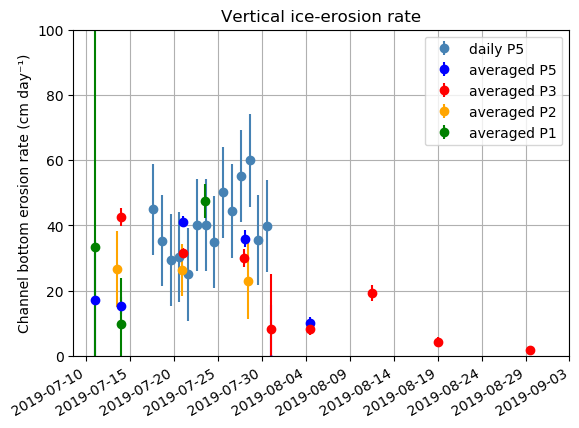

In [99]:
fig = figure()
errorbar(t_htdp5, mean.(mdp5), std.(mdp5), linestyle = "", marker = "o", color = "steelblue", label="daily P5")
errorbar(t_mean_P5, mean.(m5), std.(m5), linestyle = "", marker = "o", color = "b", label="averaged P5")
errorbar(t_mean_P3, mean.(m3), std.(m3), linestyle = "", marker = "o", color = "r", label="averaged P3")
errorbar(t_mean_P2, mean.(m2), std.(m2), linestyle = "", marker = "o", color = "orange", label="averaged P2")
errorbar(t_mean_P1, mean.(m1), std.(m1), linestyle = "", marker = "o", color = "green", label="averaged P1")

title("Vertical ice-erosion rate")
ylabel("Channel bottom erosion rate (cm day⁻¹)")
ylim(0,100)
grid(true)
xticks(DateTime(2019,7,10):Day(5):DateTime(2019,9,4))
legend()
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

**Between 10 and 30 July the water stage at P5 is rather constant, around 60cm according to field observations. We can maybe make the hypothesis of a constant water stage at first approximation. Therefore difference in elevation of two daily water level cuts can be assumed to be equal to daily channel bottom erosion rate**

# Nusselt number

## Using heat transfer equation 

**According to eq (3) in heat transfer (see above)**

**(3)**$$  h_t = \frac{Nu k_w}{\lambda} $$ 

- $Nu$ is Nusselt Number
- $k_w$ is thermal conductivity of water (W/mC)
- $\lambda$ is a carecteristic length, assumed to be the hydraulic diameter $R_D$

$$  R_D = \frac{4A}{P_w} $$ 

with $A$ the wetted cross sectio nand $P_w$ the wetted perimeter


### Import stage and discharge time series at P3 

In [100]:
#hourly discharge and std dev at P3
d, head = readdlm(path_products*"discharge_channel_hourly_std_deviation.csv" , ',', header=true);
qp3_hourly = d[:,2];
err_qp3_hour = d[:,3];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

#water stage from continuous times series at P3 
d, head = readdlm(path_products*"stage3_hour.csv" , ',', header=true);
stage3_hour = d[:,2];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]; #same than t3_hour from qp3

### Hydraulic diameter $D_H$ at P3 using `hydD3`

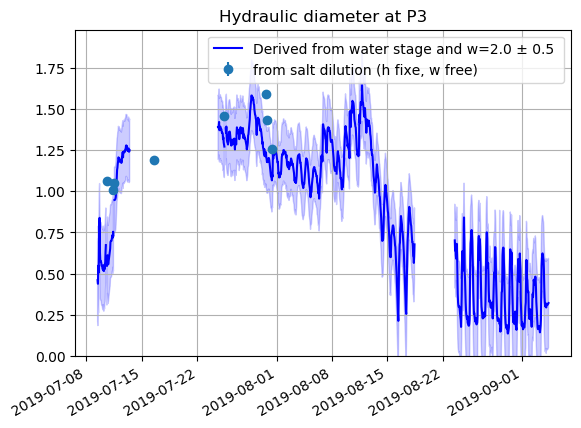

In [101]:
"""
Calculate the hydraulic diameter at P3
input:
-h water stage
- w width
This assumes a rectangluar conduit, and thus the wetted perimeter Pw = 2h + w
output:
-Hydraulic diameter
"""

function hydD3(h,w)
    return @. 4*h*w/(2*h + w)
end

DH3 = hydD3(stage3_hour .± 0.08, w);

fig=figure()

#from salt dilution: to see friction factor
errorbar(tf_53,mean.(R_h_53)*4,std.(R_h_53), linestyle = "", marker = "o", label = "from salt dilution (h fixe, w free)") 

plot(t3_hour, mean.(DH3), color = "b", label="Derived from water stage and w=$w ")
fill_between(t3_hour, mean.(DH3) .- std.(DH3), mean.(DH3) .+ std.(DH3), color = "b", alpha=0.2)
grid(true)
title("Hydraulic diameter at P3")
ylim(0)
legend()
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

In [102]:
R_h_53*4

8-element Array{Particles{Float64,2000},1}:
 1.06 ± 0.028
 1.01 ± 0.042
 1.05 ± 0.047
 1.19 ± 0.03
 1.46 ± 0.031
 1.59 ± 0.051
 1.43 ± 0.036
 1.26 ± 0.057

In [103]:
mean(mean.(R_h_53*4))

1.255585124717555

In [104]:
#Nusselt calculation from heat transfer
kw = 0.57

#assumed only vertical erosion: lamda = width
#we set the width
w = 2 ± 0.5
Nu3_w = @. ht3*w/kw

#assumed melt distributed over wetted perimeter Pw
h = 0.5 ± 0.1
Pw = w + 2*h
Nu3_Pw = @. ht3*Pw/kw;

#Standard hypothesis of lambda = hydraulic diameter

dh = 4*w*h/(2*h + w)
Nu3_dh = @. ht3*dh/kw;

#P5
#lambda5 = w
#Nu5 = @. ht5*Lc5/kw;

## Using Gnielinski correlation (using friction factor and reynolds number)

$$Nu =  \frac{\frac{f}{8}(Re - 1000)Pr}{1 + 12.7(\frac{f}{8})^\frac{1}{2}(Pr^\frac{2}{3}-1)} $$

or according to Sommers and Rajaran 2020, it could also be simplified as:

$$ Nu = 0.012(Re^{0.87} - 280)Pr^{0.4}$$



### Reynolds number

$$Re_D = \frac{\rho V D}{\mu}$$

$D$ is a characteristic length, here the hydraulic diameter

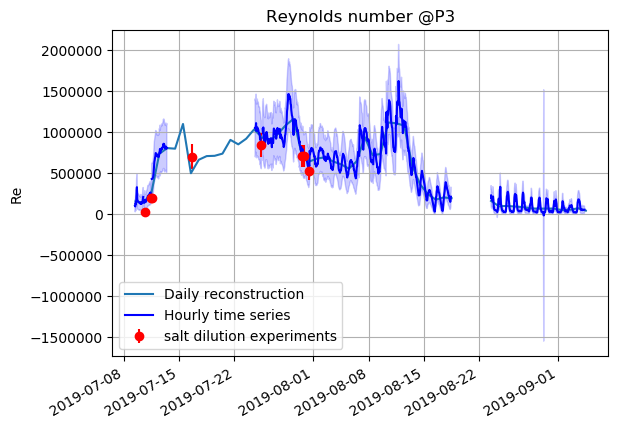

In [105]:
#Reynolds number

#DAILY Re (using reconstructed discharge and stage daily time series during the data gap in July)
re_daily = reynolds(stage3_daily, w, qp3_daily)  #No uncertainties on daily discharge and stage!

#HOURLY Re:
#We replace all NaN by random value, because NaN ± NaN leads to error message. But NaN ± x works.
for i in 1:length(err_qp3_hour)
    if isnan(err_qp3_hour[i])
        err_qp3_hour[i] = 1 #random value, doesnt matter
    end
end
re_hour = reynolds(stage3_hour .± 0.08, w, qp3_hourly .± err_qp3_hour); #See Uncertainties in Discharges_homogeneization


#Re when friction factor is computed
#Qs3 at tf_53: the time when fr is computed (i.e when all measurements are then available)
q3=[]
for i in 1:length(tf_53)
    t = findfirst(x -> x == floor(tf_53[i], Dates.Day) , floor.(ts3, Dates.Day)) #because of day there is duplication
    push!(q3, Qs3[t]) #With no uncertanties
end

#h3 at tf_53
h3=[]
for i in 1:length(tf_53)
    t = findfirst(x -> x == floor(tf_53[i], Dates.Day) , floor.(t_stage3, Dates.Day)) #because of day there is duplication
    push!(h3, stage3[t]) #With no uncertanties)
end

stage3_err=0.05
re = reynolds(h3 .± stage3_err, w, q3);

#Plot re hourly and when friction factors are computed too (which means coherent results)(in red)
fig = figure()
plot(t3_daily, mean.(re_daily), label = "Daily reconstruction")
plot(t3_hour, mean.(re_hour), color = "b", label = "Hourly time series")
fill_between(t3_hour, mean.(re_hour) .- std.(re_hour), mean.(re_hour) .+ std.(re_hour), color = "b", alpha=0.2)
errorbar(tf_53, mean.(re), std.(re), linestyle = "", marker ="o", label = "salt dilution experiments", color = "r")
legend()
title("Reynolds number @P3")
ylabel("Re")
grid(true)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

## $Re$ hourly and daily in a CSV file 

In [106]:
#Hourly Reynold
df=DataFrame(Date_Time = t3_hour, Reynold = round.(mean.(re_hour), digits=3), 
    std_dev = round.(std.(re_hour),digits=3));
CSV.write(path_products*"Reynold_hourly.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")
#Daily Reynold
df=DataFrame(Date_Time = t3_daily, Reynold = round.(mean.(re_daily), digits=3), 
    std_dev = round.(std.(re_daily),digits=3));
CSV.write(path_products*"Reynold_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

### Stream velocity from disharge `q` and wetted cross section `A`

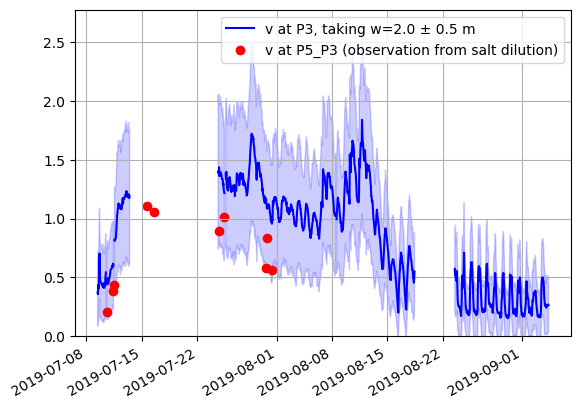

In [107]:
#To recall: we make the assumption of a 2 meter wide channel and a rectangular wetted cross section

#We REMOVE uncertainties on stage3_hour (=8cm) because, again, it leads to unstability. Still i don't know why
fig = figure()
velocity_P3_hour = stream_velocity(stage3_hour, w, qp3_hourly .± err_qp3_hour);
plot(t3_hour, mean.(velocity_P3_hour), color = "b", label = "v at P3, taking w=$w m")
fill_between(t3_hour, mean.(velocity_P3_hour) .- std.(velocity_P3_hour), mean.(velocity_P3_hour) .+ std.(velocity_P3_hour), color = "b", alpha=0.2)

#Plot velocity observed from salt dilution (see at the beginning of the notebook)
scatter(P5_P3[!,1],P5_P3[!,2], color = "red", label = "v at P5_P3 (observation from salt dilution)")

legend()
ylim(0)
grid(true)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

### Nu using Gnielinski  (with $f_d$, $P_r$ and $R_e$)

In [108]:
ff_53 = mean.(ffh_53)  #friction factor where re is available
tf_53
pr = 13.5 #Prandl number according to Clark 2003

# @P3

#Nusselt from gnielinski from salt dilution experiement:
nu3_g = @. (ff_53/8 *(re - 1000)*pr)/(1 + 12.7*(ff_53/8)^0.5 * (pr^(2/3)-1));

#Hourly Nusselt from gnielinski with fr = 0.3 (constant)
fr = 0.3
nu3_g_ffix = @. (fr/8 *(re_hour - 1000)*pr)/(1 + 12.7*(fr/8)^0.5 * (pr^(2/3)-1));

#Daily Nusselt from gnielinski with fr = 0.3 (constant)
fr = 0.3
nu3_g_ffix_daily = @. (fr/8 *(re_daily - 1000)*pr)/(1 + 12.7*(fr/8)^0.5 * (pr^(2/3)-1));

#Hourly Nusselt from gnielinski with S&R2020 empirical simplification
nu3_SR = @. 0.012*(mean.(re_hour)^0.87 - 280)*pr^0.4;

LoadError: [91mDomainError with -20642.896688141394:[39m
[91mExponentiation yielding a complex result requires a complex argument.[39m
[91mReplace x^y with (x+0im)^y, Complex(x)^y, or similar.[39m

In [109]:
ff_53 = mean.(ffh_53)  #friction factor where re is available
tf_53
pr = 13.5 #Prandl number according to Clark 2003

# @P3

#Nusselt from gnielinski from salt dilution experiement:
nu3_g = @. (ff_53/8 *(re - 1000)*pr)/(1 + 12.7*(ff_53/8)^0.5 * (pr^(2/3)-1));

#Hourly Nusselt from gnielinski with fr = 0.3 (constant)
fr = 0.3
nu3_g_ffix = @. (fr/8 *(re_hour - 1000)*pr)/(1 + 12.7*(fr/8)^0.5 * (pr^(2/3)-1));

#Daily Nusselt from gnielinski with fr = 0.3 (constant)
fr = 0.3
nu3_g_ffix_daily = @. (fr/8 *(re_daily - 1000)*pr)/(1 + 12.7*(fr/8)^0.5 * (pr^(2/3)-1));

#Hourly Nusselt from gnielinski with S&R2020 empirical simplification
mean(re_hour);

## Using Dittus Boetler Equation with standard coefficients (Clarke 2003: turbulent flow in smooth pipe)

$$ Nu = 0.023Re^\frac{4}{5}Pr^n $$

With $n=0.4$ for the fluid being heated, and $n = 0.3$ for the fluid being cooled.
**Clarke 2003** used n = 2/5 = 0.4

In [110]:
#Nusselt Dittus Boelter correlation
nu3_dittus = @. 0.023*abs.(re_hour)^0.8*pr^(0.4);

#daily
nu3_dittus_daily = @. 0.023*abs.(re_daily)^0.8*pr^(0.4); 

### Using coefficients from:  Vincent 2010, Lunardini et al 1986, Sommers and Rajaran 2020:

$$Nu = A Pr^α Re^β$$

- $Pr$ is Prandl number
- $A,α,β$ are empirical coefficient
- $Re$  reynold Number

In [111]:
#From Vincent et al 2010:
    A = 0.332
    α = 1/3
    β = 0.74
    pr
    #Hourly
    Nu_vincent = A*pr^α.*abs.(re_hour).^β;
    #Daily
    Nu_vincent_daily = A*pr^α.*abs.(re_daily).^β;

#From Jarosh and Gudmunssen 2012 (from Lunardini et al., 1986)
    A_JG = 0.0078
    β_JG = 0.927
    #hourly
    Nu_JG = A_JG*pr^α.*abs.(re_hour).^β_JG;
    #Daily
    Nu_JG_daily = A_JG*pr^α.*abs.(re_daily).^β_JG;

#From Sommer&Rajaran 2020
    A_SR = 0.0025
    β_SR = 0.927
    #hourly
    Nu_SR = A_SR*pr^(0.4).*abs.(re_hour).^β_SR;

## Using spatial-cooling-rate (SCR) method (temperature decrease) 

see [`Temperature_visualization.ipynb`](Temperature_visualization.ipynb)

$$Nu = \frac{Q C_w\rho_w L_c}{x_0 K_w P_w}$$

In [112]:
#nu with Lc = dh
#hourly
d, head = readdlm(path_products*"Nusselt_SCR_hourly.csv" , ',', header=true);
nu_dh = d[:,2];
t_nu = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];
nu_err_dh = d[:,3];
#daily
d, head = readdlm(path_products*"Nusselt_SCR_daily.csv" , ',', header=true);
nu_daily_dh = d[:,2];
t_nu_daily = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];


In [113]:
t_fill = collect(DateTime(2019,7,13,12):Day(1):(DateTime(2019,7,24,12)));
ii = findfirst(x -> x == t_fill[1], t_nu_daily)
nu_daily_gap_dh = nu_daily_dh[ii:ii+length(t_fill)-1];

# Plot Nusselt - Figure 8

In [114]:
using LaTeXStrings

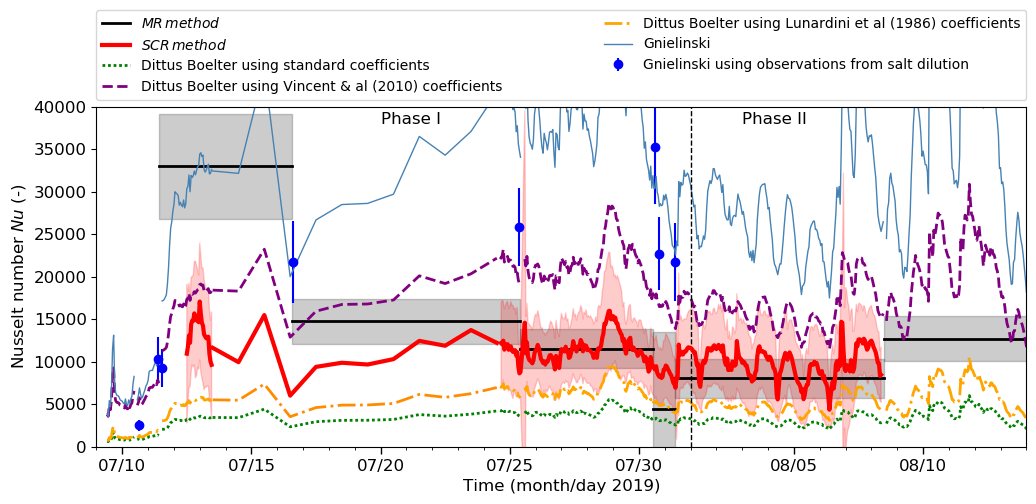

In [137]:
#PLot Nusselt

fig = figure(figsize=(12,5))

#Nu5: averaged using heat transfert at P5
#for i = 1:length(Nu5)
    #a=ti_ht5 #time initial of period (lower temporal bound)
    #b=t_ht5 #upper bound of period
    #c=Nu5
    #if i==1 #a trick to print only label once (not sure about the elegance though...)
    #    lab = "Heat transfer equation at P5, Lc5=$Lc5 m"    
    #else 
    #    lab=nothing
    #end
    #plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="blue", label=lab)
    #fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        #[mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "blue", alpha=0.2)
#end

#Nu3_w: averaged using heat transfert at P3
for i = 1:length(Nu3_w)
    a=ti_ht3 #time initial of period (lower temporal bound)
    b=t_ht3 #upper bound of period
    c=Nu3_w
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = "Heat transfer equation at P3, Lc = w =$w m"    
    else 
        lab=nothing
    end
    #plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], color ="b", label=lab)
    #fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        #[mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "b", alpha=0.2)
    
end


#Nu3_dh  ; lambda = Hydraulic diameter = dh
for i = 1:length(Nu3_dh)
    a=ti_ht3 #time initial of period (lower temporal bound)
    b=t_ht3 #upper bound of period
    c=Nu3_dh
    if i==1 #a trick to print only label once (not sure about the elegance though...)
        lab = string(L"\it MR\,method")# at P3 using ",L"\lambda = D_H =","$dh m")    
    else 
        lab=nothing
    end
    plot([a[i],b[i]],[mean.(c[i]),mean.(c[i])], linewidth=2,color ="black", label=lab)
    fill_between([a[i],b[i]],[mean.(c[i]) + std.(c[i]),mean.(c[i]) + std.(c[i])],
        [mean.(c[i]) - std.(c[i]),mean.(c[i]) - std.(c[i])], color = "black", alpha=0.2)
    
end

##using x0

##lambda=Pw
#plot(t_nu,mean.(nu_Pw), color = "red", label = "e-folding length equation, Lc = Pw = $Pw")
#fill_between(t_nu, mean.(nu_Pw) .- nu_err_Pw, mean.(nu_Pw) .+ nu_err_Pw, color = "r", alpha=0.2)
#plot(t_fill,nu_daily_gap_Pw, color = "r")
##lambda=dh
plot(t_nu,mean.(nu_dh), color = "r", linewidth=3 , label = string(L"\it SCR\,method")# using ", L"\lambda = D_H =","$dh m")
, zorder = +3)
fill_between(t_nu, mean.(nu_dh) .- nu_err_dh, mean.(nu_dh) .+ nu_err_dh, color = "r", alpha=0.2)
plot(t_fill,nu_daily_gap_dh, linewidth=3, color = "r")  


#Dittus Boelter for smooth conduict (Clarke 2003)
plot(t3_hour, mean.(nu3_dittus),linestyle=(0,(1,1)),linewidth=2, color = "green", label = "Dittus Boelter using standard coefficients")
plot(t3_daily[5:16], mean.(nu3_dittus_daily[5:16]),linestyle=(0,(1,1)),linewidth=2, color = "green") #daily Dittus Boelter
##fill_between(t3_hour, mean.(nu3_dittus) .- std.(nu3_dittus), mean.(nu3_dittus) .+ std.(nu3_dittus), color = "green", alpha=0.2)

##Dittus using Vincent coefficient
plot(t3_hour, mean.(Nu_vincent),linewidth=2,linestyle="--",color = "purple", label = "Dittus Boelter using Vincent & al (2010) coefficients")
##fill_between(t3_hour, mean.(Nu_vincent) .- std.(Nu_vincent), mean.(Nu_vincent) .+ std.(Nu_vincent), color = "grey", alpha=0.2)
plot(t3_daily[5:16],linestyle="--", linewidth=2,mean.(Nu_vincent_daily)[5:16], color = "purple")
##DB with Lunardini 1986 (also jarosh and Gudmunssen 2012)
plot(t3_hour, mean.(Nu_JG),linestyle="dashdot", linewidth=2, color = "orange", label = "Dittus Boelter using Lunardini et al (1986) coefficients")
plot(t3_daily[5:16], mean.(Nu_JG_daily)[5:16],linestyle="dashdot", linewidth=2,color = "darkorange")
#Dittus with Sommers and Rajaran 2020
#plot(t3_hour, mean.(Nu_SR), linewidth=1, color = "brown", label = "Dittus Boelter with coefficients of Sommers and Rajaran (2020)")


##Gnielinski
plot(t3_hour, mean.(nu3_g_ffix), color = "steelblue", linewidth=1, label = string("Gnielinski")) 
#fill_between(t3_hour, mean.(nu3_g_ffix) .- std.(nu3_g_ffix), mean.(nu3_g_ffix) .+ std.(nu3_g_ffix), color = "steelblue", alpha=0.2)
plot(t3_daily[5:16], mean.(nu3_g_ffix_daily[5:16]), linewidth=1,color = "steelblue")  #daily Gnielinski with fr=0.2
errorbar(tf_53,mean.(nu3_g), std.(nu3_g), linestyle="",marker="o", color = "b", label="Gnielinski using observations from salt dilution")

#Phases
axvline(x=DateTime(2019,8,1),linestyle="--",linewidth=1,color="black")
text(DateTime(2019,7,20), 38000,"Phase I", fontsize = 12)
text(DateTime(2019,8,3), 38000,"Phase II", fontsize = 12)

#title("Nusselt number @P3")
ylabel(string("Nusselt number ",L"Nu"," (-)"),fontsize=12)
ylim(0,40000)
xlabel("Time (month/day 2019)",fontsize= 12)
xlim(DateTime(2019,7,9), DateTime(2019,8,14));
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

majorformatter = matplotlib.dates.DateFormatter("%m/%d")
majorlocator   = matplotlib.dates.DayLocator(bymonthday=(5,10,15,20,25,30))
minorlocator   = matplotlib.dates.DayLocator(interval=1)
ax = gca()
ax.xaxis.set_major_formatter(majorformatter)
ax.xaxis.set_major_locator(majorlocator)
ax.xaxis.set_minor_locator(minorlocator)
ax.xaxis.set_tick_params(which="major",length=5,width=1,labelsize=12)
fig[:autofmt_xdate](bottom=0.2,rotation=0,ha="center")
#legend(bbox_to_anchor=[0.3,2],loc="top",borderaxespad=3,  fontsize=13)
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.,  fontsize=10)

savefig(path_plots*"Nusselt.pdf",bbox_inches="tight") 
savefig(path_plots*"Nusselt.png",bbox_inches="tight") 



## All Nusselt using different methods in CSV files

In [116]:
# MR method
df=DataFrame(Date_Time_start = ti_ht3, Date_time_end = t_ht3, Averaged_Nusselt = round.(mean.(Nu3_dh),digits=3),
    std_dev = round.(std.(Nu3_dh),digits=3))
CSV.write(path_products*"Nusselt_MR.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#Gnielinski
#daily
df=DataFrame(Date_Time = t3_hour, Nusselt = round.(mean.(nu3_g_ffix),digits=3),
    std_dev = round.(std.(nu3_g_ffix ),digits=3))
CSV.write(path_products*"Nusselt_Gnielinski_hourly.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");
#hourly
df=DataFrame(Date_Time = t3_daily, Nusselt = round.(mean.(nu3_g_ffix_daily),digits=3),
    std_dev = round.(std.(nu3_g_ffix_daily),digits=3))
CSV.write(path_products*"Nusselt_Gnielinski_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#DB Standard coefficient
#daily
df=DataFrame(Date_Time = t3_hour, Nusselt = round.(mean.(nu3_dittus),digits=3),
    std_dev = round.(std.(nu3_dittus),digits=3))
CSV.write(path_products*"Nusselt_DB_standard_hourly.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");
#hourly
df=DataFrame(Date_Time = t3_daily, Nusselt = round.(mean.(nu3_dittus_daily),digits=3),
    std_dev = round.(std.(nu3_dittus_daily),digits=3))
CSV.write(path_products*"Nusselt_DB_standard_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#DB Vincent et al 2010 coefficients
#daily
df=DataFrame(Date_Time = t3_hour, Nusselt = round.(mean.(Nu_vincent),digits=3),
    std_dev = round.(std.(Nu_vincent),digits=3))
CSV.write(path_products*"Nusselt_DB_Vincent2010_hourly.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");
#hourly
df=DataFrame(Date_Time = t3_daily, Nusselt = round.(mean.(Nu_vincent_daily),digits=3),
    std_dev = round.(std.(Nu_vincent_daily),digits=3))
CSV.write(path_products*"Nusselt_DB_Vincent2010_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

#DB Lunardini 1986 coefficients
#daily
df=DataFrame(Date_Time = t3_hour, Nusselt = round.(mean.(Nu_JG),digits=3),
    std_dev = round.(std.(Nu_JG),digits=3))
CSV.write(path_products*"Nusselt_DB_lunardini1986_hourly.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");
#hourly
df=DataFrame(Date_Time = t3_daily, Nusselt = round.(mean.(Nu_JG_daily),digits=3),
    std_dev = round.(std.(Nu_JG_daily),digits=3))
CSV.write(path_products*"Nusselt_DB_lunardini1986_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

# $R_e$ vs ($Nu$,$f_D$) 


In [117]:
#To conserve the original re_hour and t3_hour (when running Nusselt above after the following piece of code)
re_hour_f = deepcopy(re_hour); #filt stands for filtered
t3_hour_f = deepcopy(t3_hour);
#to conserve original Nu too
t_nu_f = deepcopy(t_nu)
nu_dh_f = deepcopy(nu_dh);

In [118]:
# Need to match re_hour_f (without nan) time series with nu_dh (=nu_dh_f)


purge = findall(isnan, mean.(re_hour_f))
deleteat!(re_hour_f, purge)  ##purge from NaN
deleteat!(t3_hour_f, purge)  ##purge from NaN  #BUT BE CAREFUL RE_HOUR AND T3_HOUR  are modified!

re_nu = []
trash = [] #to also remove the no-corresponding value in nu_dh

for i in 1:length(t_nu) #t_nu is the shortest time series
    
    j = findfirst(x -> x == t_nu_f[i], t3_hour_f)
    
    if j !== nothing && nu_dh_f[i] > 0
            x = re_hour_f[j] 
        push!(re_nu, x) 
    else
        push!(trash, i)
        
    end
          
end

deleteat!(t_nu_f, trash) 
deleteat!(nu_dh_f, trash);

### Select the bad datas (12 and 13 July:  temperature measurements not relevant) 
**ATTENTION delim1 and delime 2 are absolute value, they might change depending the vector. It will be better to use `findfirst` instead**

In [119]:
#visually  
delim1 = 1
delim2 =24;
day1  = Dates.day(t_nu_f[delim1]); day2  = Dates.day(t_nu_f[delim2]) 
month1 = Dates.monthname(t_nu_f[delim1];locale="english"); month2 = Dates.monthname(t_nu_f[delim2];locale="english")
hour1 = Dates.hour(t_nu_f[delim1]) ; hour2 = Dates.hour(t_nu_f[delim2]) ;

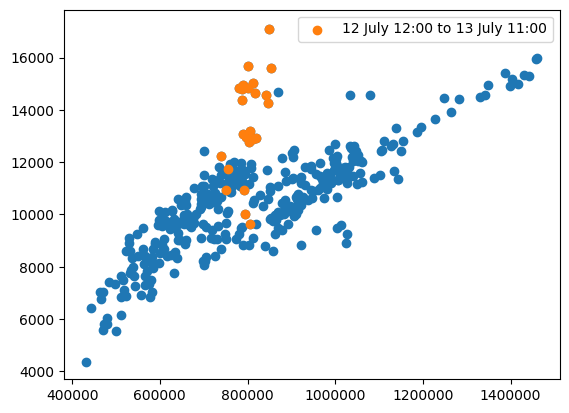

PyObject <matplotlib.legend.Legend object at 0x000000004F9F5048>

In [120]:
#plot
pygui(false)
scatter(mean.(re_nu), mean.(nu_dh_f))
scatter(mean.(re_nu[delim1:delim2]), mean.(nu_dh_f[delim1:delim2]), 
    label = "$day1 $month1 $hour1:00 to $day2 $month2 $hour2:00")
legend()

In [121]:
#mean.(vcat(re_nu[1:delim1],re_nu[delim2:end]))
#vcat(nu_dh[1:delim1],nu_dh[delim2:end])

### Fit a power law (D.B correlation) 

In [122]:
using LsqFit

fn(re_nu, p) =  p[1]*pr^(1/3)*re_nu.^p[2] # p[1]==A, p[2]== beta in DB correlation
para_weights = [0.332, 0.74] # Vincent coeff to weight initial parameters

#we actually take into account the orange dots above
fit = curve_fit(fn,mean.(re_nu), mean.(nu_dh_f) , para_weights)
# to get standard error of each parameter:
sigma = stderror(fit);
A = round(fit.param[1], digits=2)
beta = round(fit.param[2], digits=2)

0.58

In [123]:
#DB standard model
DB_std(re) = @. 0.023*pr^0.4*mean.(re)^0.8

#DB Vincent
DB_v(re) = @. 0.332*pr^(1/3)*mean.(re)^0.74

#DB Jarosh
DB_jg(re) = @. A_JG*pr^(1/3)*mean.(re)^β_JG


#Gnielinski
f=0.2
Gn(re) = @. (f/8 *(re - 1000)*pr)/(1 + 12.7*(f/8)^0.5 * (pr^(2/3)-1));

### `re3_dh` = Re averaged on `Nu3_dh` (melt rate method) 

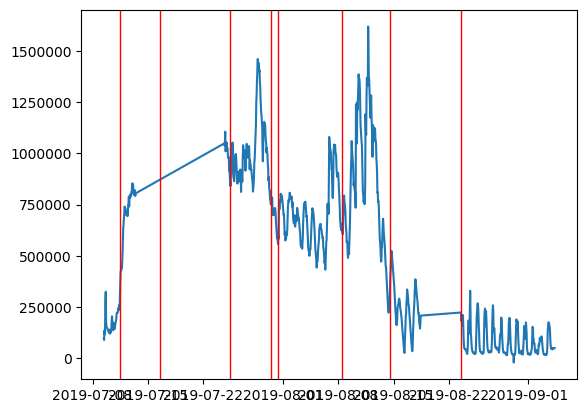

In [124]:
plot(t3_hour_f,mean.(re_hour_f))
for i in eachindex(ti_ht3)
    axvline(x=ti_ht3[i],linewidth=1,color="r")
end

In [125]:
#t initial = ti_ht3 ; t_final = t_ht3
#from 11-16 and 16-24 and 31-8 and 15-23: re is averaged using re_daily. Otherwise re is averaged using re_hour

#note: at this stage re_hour is purged from NaN, and t3_hour is modified in consequence too : see box[141]
#t3_hour is hourly, so we downscale ti_ht3 at hour too using floor() 
#this means we assume a friction factor constant over 1 hour. Seems reasonable

re3_dh = []
ti_re3_dh = [] #initial time for the re mean

#We use daily re when there is datagap in hourly re (for i=1 and 2) -> See plot just above

for i in 1:2  #1 and 2 correspond to 11 and 16 july
    x = findfirst(x -> x == floor(ti_ht3[i], Dates.Day), t3_daily - Hour(12)) 
    y = findfirst(x -> x == floor(t_ht3[i], Dates.Day), t3_daily - Hour(12))
    
    rey = filter(!isnan, re_daily[x:y]) #We remove the NaN to then calcul the mean

    re_mean = sum(rey)/length(rey)
    push!(re3_dh, re_mean)
    push!(ti_re3_dh, t3_daily[x])
end

#Now we use hourly time series for the others

for i in 3:length(ti_ht3)  #3 corespond to 25 july, and "-1" if we are not interested 
                #in 23 august-4 september value
    
    if i == 5 #there is one hour datagap in re_hour for t_ht3[5]
        x = findfirst(x -> x == floor(ti_ht3[i], Dates.Hour), t3_hour_f) 
        y = findfirst(x -> x == floor(t_ht3[i] - Hour(1), Dates.Hour), t3_hour_f)
    elseif i == 6 #the same datagap for ti_ht3[6]
        x = findfirst(x -> x == floor(ti_ht3[i] - Hour(1), Dates.Hour), t3_hour_f) 
        y = findfirst(x -> x == floor(t_ht3[i] , Dates.Hour), t3_hour_f)
    elseif i == 8 #one hour datagap for t_ht3[8], the temperature time series is one hour longer than discharge one
        x = findfirst(x -> x == floor(ti_ht3[i], Dates.Hour), t3_hour_f) 
        y = findfirst(x -> x == floor(t_ht3[i]  - Hour(1), Dates.Hour), t3_hour_f)
    else
        x = findfirst(x -> x == floor(ti_ht3[i], Dates.Hour), t3_hour_f) 
        y = findfirst(x -> x == floor(t_ht3[i], Dates.Hour), t3_hour_f)
    end
    rey = filter(!isnan, re_hour_f[x:y]) #We remove the NaN to then calcul the mean

    re_mean = sum(rey)/length(rey)
    push!(re3_dh, re_mean)
    push!(ti_re3_dh, t3_hour_f[x])  #just to check that the time-order is weel respected. Because
                    #we will plot this on a scatter plot against Nu3_dh, so time associated will be hidden
end



In [126]:
re3_dh

8-element Array{Any,1}:
 695000.0 ± 130000.0
 792000.0 ± 150000.0
      1.01e6 ± 180000.0
 695000.0 ± 150000.0
 697000.0 ± 140000.0
 862000.0 ± 160000.0
 242000.0 ± 59000.0
  79300.0 ± 21000.0

In [127]:
ti_re3_dh

8-element Array{Any,1}:
 2019-07-11T12:00:00
 2019-07-16T12:00:00
 2019-07-25T09:00:00
 2019-07-30T13:00:00
 2019-07-31T09:00:00
 2019-08-08T11:00:00
 2019-08-14T11:00:00
 2019-08-23T12:00:00

In [128]:
ti_ht3

8-element Array{Any,1}:
 2019-07-11T10:10:00
 2019-07-16T13:17:00
 2019-07-25T09:48:00
 2019-07-30T13:20:00
 2019-07-31T09:33:00
 2019-08-08T12:00:00
 2019-08-14T11:50:00
 2019-08-23T12:46:00

In [129]:
Nu3_dh

8-element Array{Particles{Float64,2000},1}:
 33000.0 ± 6200.0
 14700.0 ± 2600.0
 11500.0 ± 2300.0
  4410.0 ± 9100.0
  8020.0 ± 2300.0
 12700.0 ± 2700.0
 13900.0 ± 6500.0
  8600.0 ± 6400.0

## Errors between Nu observed by SCR and modeled by Dittus-Boelter fit

In [130]:
#we calculate the diff between Nu observed (nu_dh_f) and the modeled one by the pwer fit: fn(mean.(re_nu), fit.param)
nu_theo = fn(mean.(re_nu), fit.param) #Nu theorique modelled by DB
dif = abs.(mean.(nu_dh_f) .- nu_theo)
err_rel = mean(dif./nu_theo)  #erreur relative 


0.09335021325408695

## Plot Re vs Nu - Figure 9

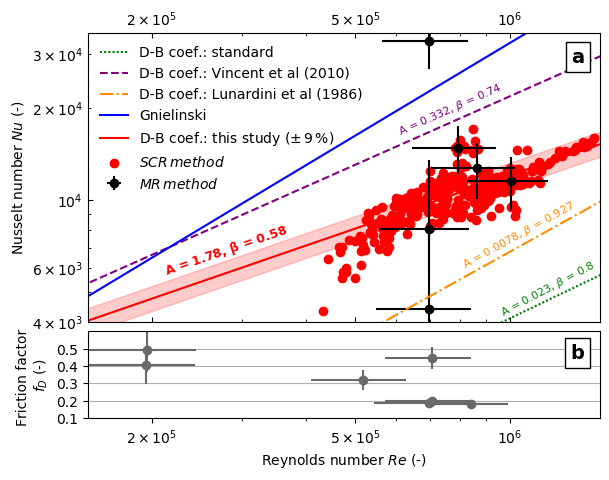

In [145]:
pygui(false)
fig = figure("pyplot_figure",figsize=(8,5))


#NUSSELT
subplots_adjust(hspace=0.05) # Set the vertical spacing between axes
spec = fig.add_gridspec(2, 2, width_ratios=[1,0.1],height_ratios=[1,0.3]) #a trick to "hide" somehow the righ subplot

#ax1 = subplot(211)
#ax1 = subplot(211,width_ratios=1,height_ratios=1)
ax1 = subplot(spec[1, 1],xscale="log",yscale="log") # Create the 1st axis of a 3x1 array of axes
#ax1 = fig.add_subplot(spec[0, 3])
#re vs nu from melt rate method "-2" because we don't plot the last two Nu (no longer drainage, high errors)
errorbar(mean.(re3_dh[1:end-2]),mean.(Nu3_dh[1:end-2]), xerr = std.(re3_dh[1:end-2]), 
    yerr = std.(Nu3_dh[1:end-2]), linestyle="", marker="o", color="black", label=L"\itMR\,method")

#re vs nu from T decrease method
scatter(mean.(re_nu), mean.(nu_dh_f), color="r", label=L"\itSCR\,method")
#scatter(mean.(re_nu[delim1:delim2]), mean.(nu_dh_f[delim1:delim2]), color="orange",label = "Observations from $day1 $month1 $hour1:00 
#to $day2 $month2 $hour2:00")
ylim(4000,35000)
xlim(150000,1500000) #first re for friction factor is 195000
#xticks([200000,1E6])  #WARNING, this is manual labelling xticks


#plot(0,0,label="  ",alpha=0) #a trick to lezt one space in legend...
#text(155000,30000,L"\mathbf{Dittus-Boelter\,equation:}", color="black", fontsize = 9, fontweight="bold") 
#plot(0,0,label=L"\mathbf{Dittus-Boelter\,Equation:}",alpha=0)

readouts =  range(0, 1600000, step=100)
#DB
#err relative in our DB  fit
fill_between(readouts, fn(readouts, fit.param) .- err_rel*fn(readouts, fit.param), 
   fn(readouts, fit.param) .+ err_rel*fn(readouts, fit.param), color = "r", alpha=0.2)
ax1.text(0.97, 0.95, "a", transform=ax1.transAxes, ha="right", va="top", weight="bold",fontsize=14
,bbox= bbox=Dict(:boxstyle=>"square",:facecolor=>"white", :alpha=>1))
plot(readouts,DB_std(readouts),linestyle=(0,(1,1)), color="green", label="D-B coef.: standard")
plot(readouts,DB_v(readouts),linestyle="--", color="purple", label="D-B coef.: Vincent et al (2010)")
plot(readouts,DB_jg(readouts), linestyle="dashdot",color="darkorange", label="D-B coef.: Lunardini et al (1986)")
#Gnielinski
plot(readouts,Gn(readouts), color="blue", label = string("Gnielinski"))
#This study
plot(readouts,fn(readouts, fit.param), color="red", label = string("D-B coef.: this study ",L"(\pm\,9\,\%)"), zorder=-1)

#text A and beta
text(210000,5700,string("A = $A, ",L"\mathbf{\beta}"," = $beta"),rotation=19, color="r", fontsize = 9, fontweight="bold") 
text(600000,16300,string("A = 0.332, ",L"\beta"," = 0.74"),rotation=24, color="purple", fontsize = 8)     
text(800000,6000,string("A = $A_JG, ",L"\beta"," = $β_JG"),rotation=29, color="darkorange", fontsize = 8)   
text(950000,4200,string("A = 0.023, ",L"\beta"," = 0.8"),rotation=28, color="green", fontsize = 8) 

xticks([200000:100000:1E6])
ax1.tick_params(which="minor",top=true,bottom=true,direction="in",labelbottom=false)
ax1.tick_params(which="major",top=true,bottom=true,direction="in",labelbottom=false,labeltop=true) 
ylabel(string("Nusselt number ",L"Nu"," (-)"),fontsize=10)
legend(fontsize=10,frameon=false)


#FRICTION FACTOR

ax2 = subplot(spec[2, 1],sharex=ax1)

errorbar(mean.(re),mean.(ffh_53), xerr = std.(re), yerr = std.(ffh_53), linestyle="", marker="o", color="dimgray")
ylabel(string("Friction factor 
",L"f_D"," (-)"),fontsize=10)
ylim(0.1,0.6)  #to remove the ffh to high: geometry not weel constrained enough to obtain the hydraulic diameter
yticks(0.1:0.1:0.5)
ax2.yaxis.grid(true)
ax2.text(0.97, 0.86, "b", transform=ax2.transAxes, ha="right", va="top", weight="bold",fontsize=14
,bbox= bbox=Dict(:boxstyle=>"square",:facecolor=>"white", :alpha=>1))

xticks([200000,500000,1E6],[L"2\times10^5",L"5\times10^5",L"10^6"]) 
xlabel(string("Reynolds number ",L"Re"," (-)"),fontsize=10)


savefig(path_plots*"Nu_Re.pdf",bbox_inches="tight") 


In [132]:
ffh_53

8-element Array{Any,1}:
 2.66 ± 0.32
 0.495 ± 0.13
 0.404 ± 0.11
 0.187 ± 0.015
 0.181 ± 0.019
 0.445 ± 0.064
 0.197 ± 0.027
 0.32 ± 0.057

In [133]:
tf_53

8-element Array{Any,1}:
 2019-07-10T15:35:25
 2019-07-11T09:27:05
 2019-07-11T12:51:40
 2019-07-16T14:12:10
 2019-07-25T08:44:25
 2019-07-30T14:47:15
 2019-07-30T18:34:05
 2019-07-31T09:39:30

In [134]:
re

8-element Array{Particles{Float64,2000},1}:
  20900.0 ± 5100.0
 196000.0 ± 49000.0
 195000.0 ± 48000.0
 695000.0 ± 150000.0
 841000.0 ± 150000.0
 706000.0 ± 130000.0
 706000.0 ± 130000.0
 518000.0 ± 110000.0